https://www.spe.org/datasets/dataset_1/

# EDA
Для проекта использовал набор данных по добыче сланцевой нефти и газа от Общества инженеров-нефтяников.

Проектов на самом деле два:

1. Проверка применимости закона Арпса.

2. Прогнозирование добычи.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Данные по скважинам

In [122]:
well_data = pd.read_csv('well_data.csv', index_col='Lease').transpose(); well_data

Lease         Well Number State Formation/Reservoir  \
OSPREY                  1    TX          EAGLE FORD   
FALCON                  2    TX          EAGLE FORD   
HAWK                    3    TX          EAGLE FORD   
EAGLE                   4    TX          EAGLE FORD   
KITE                    5    TX          EAGLE FORD   
SWIFT                   6    TX          EAGLE FORD   
SPARROW                 7    TX          EAGLE FORD   
LARK                    8    TX          EAGLE FORD   
CARDINAL                9    TX          EAGLE FORD   
JAY                    10    TX          EAGLE FORD   
CROW                   11    TX          EAGLE FORD   
LORIKEET               62    LA   HAYNESVILLE SHALE   
MYNAH                  63    LA   HAYNESVILLE SHALE   
PARTRIDGE              64    LA   HAYNESVILLE SHALE   
CASSOWARY              65    LA   HAYNESVILLE SHALE   
ORIOLE                 66    LA   HAYNESVILLE SHALE   
WARBLER                67    LA   HAYNESVILLE SHALE   
HARPY                  68    LA   HAYNESVILLE SHALE   
BEE-EATER              69    LA   HAYNESVILLE SHALE   
LOON                   70    LA   HAYNESVILLE SHALE   
CUCKOO                 71    LA      BOSSIER SHALE    
ROOSTER                72    LA   HAYNESVILLE SHALE   
ARCHAEOPTERYX          73    LA   HAYNESVILLE SHALE   
TERN                   74    LA   HAYNESVILLE SHALE   
STILT                  75    LA   HAYNESVILLE SHALE   
AVOCET                 76    LA   HAYNESVILLE SHALE   
OSTRICH                23    PA           MARCELLUS   
EMU                    24    PA           MARCELLUS   
DUCK                   25    PA           MARCELLUS   
HERON                  26    PA           MARCELLUS   
STORK                  27    PA           MARCELLUS   
SWAN                   28    PA           MARCELLUS   
PARROT                 29    PA           MARCELLUS   
CRANE                  30    PA           MARCELLUS   
IBIS                   31    PA           MARCELLUS   
EGRET                  32    PA           MARCELLUS   
PHEASANT               33    PA           MARCELLUS   
MACAW                  34    PA   MARCELLUS - UPPER   
FLAMINGO               35    PA   MARCELLUS - UPPER   
PEACOCK                36    PA   MARCELLUS - UPPER   
PENGUIN                37    PA   MARCELLUS - UPPER   
ALBATROSS              38    PA   MARCELLUS - UPPER   
PELICAN                39    PA   MARCELLUS - UPPER   
OWL                    40    PA   MARCELLUS - UPPER   
FINCH                  41    PA   MARCELLUS - UPPER   
ROBIN                  42    PA   MARCELLUS - UPPER   
BLUEBIRD               43    PA   MARCELLUS - UPPER   
CANARY                 44    PA   MARCELLUS - UPPER   
SEAGULL                45    PA   MARCELLUS - UPPER   
HUMMINGBIRD            46    PA   MARCELLUS - UPPER   
PHOENIX                47    PA   MARCELLUS - UPPER   
TOUCAN                 48    PA   MARCELLUS - UPPER   
GOOSE                  49    PA   MARCELLUS - UPPER   

Lease          Initial Pressure Estimate (psi)   \
OSPREY                                     5400   
FALCON                                     5700   
HAWK                                       5650   
EAGLE                                      5000   
KITE                                       5000   
SWIFT                                      5164   
SPARROW                                    5164   
LARK                                       5700   
CARDINAL                                   5900   
JAY                                        5700   
CROW                                       5500   
LORIKEET                                   9939   
MYNAH                                      9800   
PARTRIDGE                                  9900   
CASSOWARY                                 12223   
ORIOLE                                    11325   
WARBLER                                   11000   
HARPY                                     11325   
BEE-EATER                                 10000   
LOON     

Удаляю символ %.

In [123]:
well_data.replace(to_replace=r'%$', value='', regex=True, inplace=True)

In [124]:
well_data.to_csv('well_data_modified.csv')

In [41]:
well_data = pd.read_csv('well_data_modified.csv', index_col=0); well_data

Formation/Reservoir   Initial Pressure Estimate (psi)   \
OSPREY                 EAGLE FORD                               5400   
FALCON                 EAGLE FORD                               5700   
HAWK                   EAGLE FORD                               5650   
EAGLE                  EAGLE FORD                               5000   
KITE                   EAGLE FORD                               5000   
SWIFT                  EAGLE FORD                               5164   
SPARROW                EAGLE FORD                               5164   
LARK                   EAGLE FORD                               5700   
CARDINAL               EAGLE FORD                               5900   
JAY                    EAGLE FORD                               5700   
CROW                   EAGLE FORD                               5500   
LORIKEET        HAYNESVILLE SHALE                               9939   
MYNAH           HAYNESVILLE SHALE                               9800   
PARTRIDGE       HAYNESVILLE SHALE                               9900   
CASSOWARY       HAYNESVILLE SHALE                              12223   
ORIOLE          HAYNESVILLE SHALE                              11325   
WARBLER         HAYNESVILLE SHALE                              11000   
HARPY           HAYNESVILLE SHALE                              11325   
BEE-EATER       HAYNESVILLE SHALE                              10000   
LOON            HAYNESVILLE SHALE                              10000   
CUCKOO             BOSSIER SHALE                               10500   
ROOSTER         HAYNESVILLE SHALE                              10500   
ARCHAEOPTERYX   HAYNESVILLE SHALE                              10300   
TERN            HAYNESVILLE SHALE                              10450   
STILT           HAYNESVILLE SHALE                              10800   
AVOCET          HAYNESVILLE SHALE                              11000   
OSTRICH                 MARCELLUS                               3486   
EMU                     MARCELLUS                               5531   
DUCK                    MARCELLUS                               3900   
HERON                   MARCELLUS                               3500   
STORK                   MARCELLUS                               3000   
SWAN                    MARCELLUS                               4500   
PARROT                  MARCELLUS                               4750   
CRANE                   MARCELLUS                               5538   
IBIS                    MARCELLUS                               5508   
EGRET                   MARCELLUS                               5227   
PHEASANT                MARCELLUS                               4450   
MACAW           MARCELLUS - UPPER                               4609   
FLAMINGO        MARCELLUS - UPPER                               4500   
PEACOCK         MARCELLUS - UPPER                               3150   
PENGUIN         MARCELLUS - UPPER                               3400   
ALBATROSS       MARCELLUS - UPPER                               5000   
PELICAN         MARCELLUS - UPPER                               2500   
OWL             MARCELLUS - UPPER                               2200   
FINCH           MARCELLUS - UPPER                               4300   
ROBIN           MARCELLUS - UPPER                               4100   
BLUEBIRD        MARCELLUS - UPPER                               4200   
CANARY          MARCELLUS - UPPER                               4300   
SEAGULL         MARCELLUS - UPPER                               4400   
HUMMINGBIRD     MARCELLUS - UPPER                               4000   
PHOENIX         MARCELLUS - UPPER                               4450   
TOUCAN          MARCELLUS - UPPER                               3900   
GOOSE           MARCELLUS - UPPER                               5200   

                Reservoir Temperature (deg F)    Net Pay (ft)   \
OSPREY                                     225             

In [126]:
well_data.dtypes

Well Number                            int64
State                                 object
Formation/Reservoir                   object
 Initial Pressure Estimate (psi)       int64
 Reservoir Temperature (deg F)         int64
                                      ...   
 Casing Footage 1 (ft) .4            float64
 Casing ID 2 (in) .4                 float64
 Casing Footage 2 (ft) .4            float64
 Casing Depth (ft) .4                float64
 Description                          object
Length: 94, dtype: object

Теперь результаты измерений имеют числовой формат

## Категориальные переменные

In [127]:
well_data.select_dtypes(include='object')

State Formation/Reservoir   Spacing   \
OSPREY           TX          EAGLE FORD       1400   
FALCON           TX          EAGLE FORD       1000   
HAWK             TX          EAGLE FORD       1000   
EAGLE            TX          EAGLE FORD  Unbounded   
KITE             TX          EAGLE FORD       1400   
SWIFT            TX          EAGLE FORD       1500   
SPARROW          TX          EAGLE FORD       1500   
LARK             TX          EAGLE FORD        800   
CARDINAL         TX          EAGLE FORD        700   
JAY              TX          EAGLE FORD        700   
CROW             TX          EAGLE FORD       1300   
LORIKEET         LA   HAYNESVILLE SHALE        NaN   
MYNAH            LA   HAYNESVILLE SHALE       1000   
PARTRIDGE        LA   HAYNESVILLE SHALE       1000   
CASSOWARY        LA   HAYNESVILLE SHALE       1300   
ORIOLE           LA   HAYNESVILLE SHALE        850   
WARBLER          LA   HAYNESVILLE SHALE        850   
HARPY            LA   HAYNESVILLE SHALE        850   
BEE-EATER        LA   HAYNESVILLE SHALE       1050   
LOON             LA   HAYNESVILLE SHALE       1050   
CUCKOO           LA      BOSSIER SHALE         NaN   
ROOSTER          LA   HAYNESVILLE SHALE       1250   
ARCHAEOPTERYX    LA   HAYNESVILLE SHALE       1050   
TERN             LA   HAYNESVILLE SHALE       1050   
STILT            LA   HAYNESVILLE SHALE        850   
AVOCET           LA   HAYNESVILLE SHALE        850   
OSTRICH          PA           MARCELLUS        NaN   
EMU              PA           MARCELLUS       1850   
DUCK             PA           MARCELLUS       1650   
HERON            PA           MARCELLUS       1500   
STORK            PA           MARCELLUS       1400   
SWAN             PA           MARCELLUS       1300   
PARROT           PA           MARCELLUS       1250   
CRANE            PA           MARCELLUS        830   
IBIS             PA           MARCELLUS        830   
EGRET            PA           MARCELLUS        NaN   
PHEASANT         PA           MARCELLUS       1800   
MACAW            PA   MARCELLUS - UPPER       1500   
FLAMINGO         PA   MARCELLUS - UPPER       1500   
PEACOCK          PA   MARCELLUS - UPPER       1500   
PENGUIN          PA   MARCELLUS - UPPER       1500   
ALBATROSS        PA   MARCELLUS - UPPER        NaN   
PELICAN          PA   MARCELLUS - UPPER       1200   
OWL              PA   MARCELLUS - UPPER       1200   
FINCH            PA   MARCELLUS - UPPER       1700   
ROBIN            PA   MARCELLUS - UPPER       1700   
BLUEBIRD         PA   MARCELLUS - UPPER       1500   
CANARY           PA   MARCELLUS - UPPER       1500   
SEAGULL          PA   MARCELLUS - UPPER       1300   
HUMMINGBIRD      PA   MARCELLUS - UPPER       1300   
PHOENIX          PA   MARCELLUS - UPPER        900   
TOUCAN           PA   MARCELLUS - UPPER        900   
GOOSE            PA   MARCELLUS - UPPER        NaN   

                                       # of Total Proppant (Lbs)  \
OSPREY                                                  13514540   
FALCON                                                  35970960   
HAWK                                                    38064782   
EAGLE                                                   25267400   
KITE                                                    18554774   
SWIFT                                                   27785630   
SPARROW                                                 27550700   
LARK                                                    27024578   
CARDINAL                                                26576840   
JAY                                                     25986000   
CROW                                                    39020000   
LORIKEET                                               3,591,544   
MYNAH                                                 23,245,567   
PARTRIDGE                                             22,963,009   
CASSOWARY                                              6,134,650   
ORIOLE   

In [128]:
well_data.State.unique()

array(['TX', 'LA', 'PA'], dtype=object)

In [129]:
well_data.groupby(['State', 'Formation/Reservoir']).agg({' Description ': 'count'})

Description 
State Formation/Reservoir               
LA    BOSSIER SHALE                    1
      HAYNESVILLE SHALE               14
PA    MARCELLUS                       11
      MARCELLUS - UPPER               16
TX    EAGLE FORD                      11

Два штата расположены рядом, третий - на другом конце страны, но пласты во всех штатах разные, поэтому столбец "Штат" можно не использовать, т.к. это административное понятие, а пласт - геологическое.

Следующие 3 колонки - переводим в количественные.

In [130]:
well_data[' Spacing '].unique()

array(['1400', '1000', 'Unbounded', '1500', '800', '700', '1300', nan,
       '850', '1050', '1250', '1850', '1650', '830', '1800', '1200',
       '1700', '900'], dtype=object)

Spacing обычно измеряют в единицах площади на каждую скважину. Unbounded - одна скважина без соседей, т.е. "бесконечность". Преобразую в обратную величину - число скважин на единицу площади.

In [131]:
well_data['inverse_spacing'] = well_data[' Spacing ']\
    .replace(to_replace='Unbounded', value=np.inf)\
    .astype('float')\
    .apply(lambda x: 1/x)

В двух других колонках у некоторых значений есть разделитель разрядов ",".

In [132]:
well_data[['# of Total Proppant (Lbs)', 'Total Fluid (Bbls)']] = well_data[['# of Total Proppant (Lbs)', 'Total Fluid (Bbls)']]\
    .replace(to_replace=r',', value='', regex=True)\
    .astype('float')

Изучаю описание

In [133]:
well_data[' Description '].to_list()

[' Well began producing and was later recompleted with modern completion design. ',
 ' Interior well on a 3-well pad that was shut-in due to market conditions. Interpreted well response showed increased productivity post shut-in period. ',
 ' Exterior well on a 3-well pad that was shut-in due to market conditions. Interpreted well response showed decreased productivity post shut-in period. ',
 ' Single unbounded well with modern completion design. ',
 ' Child well with modern completion design offsetting parent well with legacy completion design. ',
 ' Exterior well on a 2-well pad with modern completion design. ',
 ' Exterior well on a 2-well pad with modern completion design. ',
 ' Exterior well on a 3-well pad with modern completion design. ',
 ' Exterior well on a 3-well pad with modern completion design. ',
 ' Interior well on a 3-well pad with modern completion design. ',
 ' Child well that was codeveloped with adjacent well on a 2-well pad. Well was shut-in due to market conditi

### _У первых трех скважин сложная история: у первой выполняли повторное заканчивание, у второй и третьей был длительный простой. Учесть при обработке данных по добыче._

In [134]:
well_data[' Configuration '].unique()

array([' Initial Config ', '\xa0Initial Config\xa0'], dtype=object)

По сути, одно значение. Эту и следующие колонки в данной версии не использую.Также не использую номер скважины, т.к. индентификация в других таблицах по названию.

In [135]:
well_data.drop(columns=['Well Number', 'State', ' Spacing ', ' Configuration ',
       'Production Path', 'Pressure Loss Correlation', 'Production Path.1',
       'Pressure Loss Correlation.1', 'Production Path.2',
       'Pressure Loss Correlation.2', 'Production Path.3',
       'Pressure Loss Correlation.3', 'Production Path.4',
       'Pressure Loss Correlation.4', ' Description '], inplace=True)

## Количественные переменные

In [136]:
well_data.columns

Index(['Formation/Reservoir', ' Initial Pressure Estimate (psi) ',
       ' Reservoir Temperature (deg F) ', ' Net Pay (ft) ',
       ' Wellbore Diameter (ft) ', 'Porosity', ' Water Saturation ',
       ' Oil Saturation ', ' Gas Saturation ', ' Gas Specific Gravity ', 'CO2',
       ' H2S ', 'N2', 'Condensate Yield (Bc/MMcf)', 'Condensate Gravity (API)',
       ' Dew Point Pressure (psi) ', 'Sep. Temperature (deg F)',
       'Sep. Pressure (psi)', ' Oil Gravity (API) ', ' Initial GOR (scf/bbl) ',
       ' Bubble Point Pressure (psi) ', ' TVD (ft) ', '# Stages',
       '# Clusters ', '# Clusters per Stage', 'Pre-Refrac Completion # Stages',
       'Pre-Refrac Completion # Clusters ',
       'Initian Completion # Clusters per Stage', '# of Total Proppant (Lbs)',
       'Total Fluid (Bbls)', ' Lateral Length (ft) ', ' Top Perf (ft) ',
       ' Bottom Perf (ft) ', ' Sandface Temp (deg F) ',
       ' Static Wellhead Temp (deg F) ', ' Tubing ID (in) ',
       ' Tubing OD (in) ', ' Tubing Dept

In [137]:
well_data[' Configuration Change (Days Since First Prod) '].unique()

array([ 64.,  61.,  40., 205., 111., 144., 156., 122., 119., 132.,  24.,
        50.,  nan, 429., 431., 426., 236., 421., 424., 381., 306., 305.])

In [138]:
well_data[' Configuration Change (Days Since First Prod) .1'].unique()

array([1101.,  123.,  125.,   nan,  896.,  887.,  438.,  486.,  480.,
        216.])

In [139]:
well_data[' Configuration Change (Days Since First Prod) .2'].unique()

array([1302.,  196.,  233.,   nan,  248.])

In [140]:
well_data[' Configuration Change (Days Since First Prod) .3'].unique()

array([1602.,   nan])

Были изменения конструкции скважин.

In [141]:
well_data[[' Configuration Change (Days Since First Prod) ',
           ' Configuration Change (Days Since First Prod) .1',
          ' Configuration Change (Days Since First Prod) .2',
          ' Configuration Change (Days Since First Prod) .3']]\
                .dropna(how='all')

Configuration Change (Days Since First Prod)   \
OSPREY                                              64.0   
FALCON                                              61.0   
HAWK                                                40.0   
EAGLE                                              205.0   
KITE                                               111.0   
SWIFT                                              144.0   
SPARROW                                            156.0   
LARK                                               122.0   
CARDINAL                                           119.0   
JAY                                                132.0   
CROW                                                24.0   
LORIKEET                                            50.0   
ORIOLE                                             429.0   
WARBLER                                            429.0   
HARPY                                              431.0   
CUCKOO                                             426.0   
EMU                                                236.0   
PELICAN                                            421.0   
OWL                                                424.0   
BLUEBIRD                                           381.0   
CANARY                                             381.0   
PHOENIX                                            306.0   
TOUCAN                                             305.0   

           Configuration Change (Days Since First Prod) .1  \
OSPREY                                              1101.0   
FALCON                                               123.0   
HAWK                                                 125.0   
EAGLE                                                  NaN   
KITE                                                   NaN   
SWIFT                                                896.0   
SPARROW                                              887.0   
LARK                                                 438.0   
CARDINAL                                             486.0   
JAY                                                  480.0   
CROW                                                 216.0   
LORIKEET                                               NaN   
ORIOLE                                                 NaN   
WARBLER                                                NaN   
HARPY                                                  NaN   
CUCKOO                                                 NaN   
EMU                                                    NaN   
PELICAN                                                NaN   
OWL                                                    NaN   
BLUEBIRD                                               NaN   
CANARY                                                 NaN   
PHOENIX                                                NaN   
TOUCAN                                                 NaN   

           Configuration Change (Days Since First Prod) .2  \
OSPREY                                              1302.0   
FALCON                                               196.0   
HAWK                                                 233.0   
EAGLE                                                  NaN   
KITE                                                   NaN   
SWIFT                                                  NaN   
SPARROW                                                NaN   
LARK                                                   NaN   
CARDINAL                                               NaN   
JAY                                                    NaN   
CROW                                                 248.0   
LORIKEET                                               NaN   
ORIOLE                                                 NaN   
WARBLER                                                NaN   
HARPY                                                  NaN   
CUCKOO                                                 NaN   
EMU                        

### _Видно, что изменений было больше трех. Учесть при обработке данных по добыче._

# Данные по добыче

In [2]:
production_data = pd.read_csv('production_data.csv', index_col='Lease'); production_data

Time (Days)  Choke Size  Gas Volume (MMscf)  Oil Volume (stb)  \
Lease                                                                   
OSPREY          1.0         NaN               0.145            504.39   
OSPREY          2.0         NaN               0.186            564.76   
OSPREY          3.0         NaN               0.231            653.51   
OSPREY          4.0         NaN               0.268            740.71   
OSPREY          5.0         NaN               0.261            678.06   
...             ...         ...                 ...               ...   
GOOSE        2842.0         NaN               0.000              0.00   
GOOSE        2843.0         NaN               0.000              0.00   
GOOSE        2844.0         NaN               0.000              0.00   
GOOSE        2845.0         NaN               0.000              0.00   
GOOSE        2846.0         NaN               0.000              0.00   

        Water Volume  (stb)  Gas Lift Inj Volume  (MMscf)  \
Lease                                                       
OSPREY                718.0                           NaN   
OSPREY                922.0                           NaN   
OSPREY                753.0                           NaN   
OSPREY                700.0                           NaN   
OSPREY                530.0                           NaN   
...                     ...                           ...   
GOOSE                   0.0                           NaN   
GOOSE                   0.0                           NaN   
GOOSE                   0.0                           NaN   
GOOSE                   0.0                           NaN   
GOOSE                   0.0                           NaN   

        Casing Pressure  (psi(a))  Tubing Pressure  (psi(a))  \
Lease                                                          
OSPREY                2064.695943                  14.695943   
OSPREY                1989.695943                  14.695943   
OSPREY                1864.695943                  14.695943   
OSPREY                1814.695943                  14.695943   
OSPREY                1714.695943                  14.695943   
...                           ...                        ...   
GOOSE                 1724.502000                  -0.755000   
GOOSE                 1723.853000                  -0.111000   
GOOSE                 1723.499000                  -0.398000   
GOOSE                 1722.222000                  -0.555000   
GOOSE                 1722.120000                  -0.115000   

        Active Pressure  (psi(a))  Line Pressure  (psi(a)) Pressure Source   \
Lease                                                                         
OSPREY                2064.695943                14.695943  Casing Pressure   
OSPREY                1989.695943                14.695943  Casing Pressure   
OSPREY                1864.695943                14.695943  Casing Pressure   
OSPREY                1814.695943                14.695943  Casing Pressure   
OSPREY                1714.695943                14.695943  Casing Pressure   
...                           ...                      ...              ...   
GOOSE                   -0.755000                 1.723000  Tubing Pressure   
GOOSE                   -0.111000                 2.343000  Tubing Pressure   
GOOSE                   -0.398000                 1.099000  Tubing Pressure   
GOOSE                   -0.555000                 0.633000  Tubing Pressure   
GOOSE                   -0.115000                 0.626000  Tubing Pressure   

        Calculated Sandface Pressure  (psi(a))  
Lease                                           
OSPREY                             5050.159793  
OSPREY                             5009.599839  
OSPREY                             4795.991972  
OSPREY                             4696.626023  
OSPREY                             4546.990059  
...                                        ...  
GOOSE      

Целевые переменные: дебит газа и нефти. Дебит воды - также целевая переменная, но нежелательная, т.к. негативно влияет на экономику.

Временные интервалы для разных скважин разные:

In [143]:
production_data.groupby(level=0).agg({'Time (Days)': 'max'})

Time (Days)
Lease                     
ALBATROSS          893.000
ARCHAEOPTERYX      856.000
AVOCET             508.000
BEE-EATER          417.000
BLUEBIRD          1123.000
CANARY            1123.000
CARDINAL           781.000
CASSOWARY         2393.000
CRANE             2190.000
CROW               345.000
CUCKOO            1033.000
DUCK              1156.000
EAGLE             1483.000
EGRET             3692.000
EMU               1076.000
FALCON             249.625
FINCH             1738.000
FLAMINGO           541.000
GOOSE             2846.000
HARPY              925.000
HAWK               249.375
HERON              636.000
HUMMINGBIRD        508.000
IBIS              2190.000
JAY                782.000
KITE              1066.000
LARK               783.000
LOON               417.000
LORIKEET          4031.000
MACAW              541.000
MYNAH              589.000
ORIOLE             925.000
OSPREY            2355.000
OSTRICH           3158.000
OWL                898.000
PARROT             636.000
PARTRIDGE          589.000
PEACOCK            601.000
PELICAN            898.000
PENGUIN            601.000
PHEASANT           771.000
PHOENIX            501.000
ROBIN             1729.000
ROOSTER           1432.000
SEAGULL            504.000
SPARROW           1245.000
STILT              507.000
STORK              636.000
SWAN               636.000
SWIFT             1245.000
TERN               856.000
TOUCAN             500.000
WARBLER            925.000

Дебит нефти

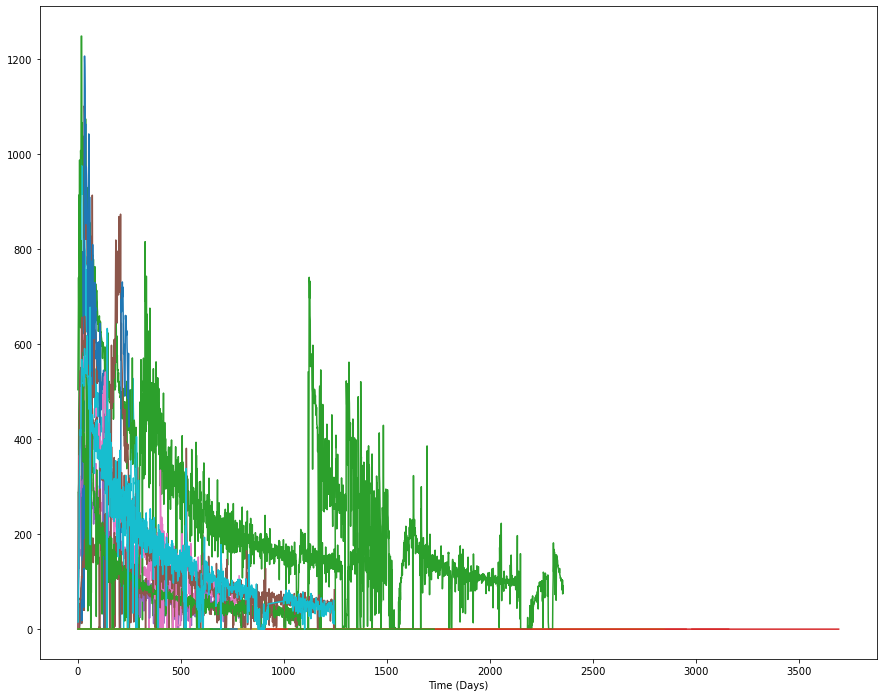

In [144]:
fig, ax = plt.subplots(figsize=(15,12))
production_data.groupby(level=0).plot.line(x='Time (Days)', y='Oil Volume (stb)', ax=ax, legend=False);

Дебит газа

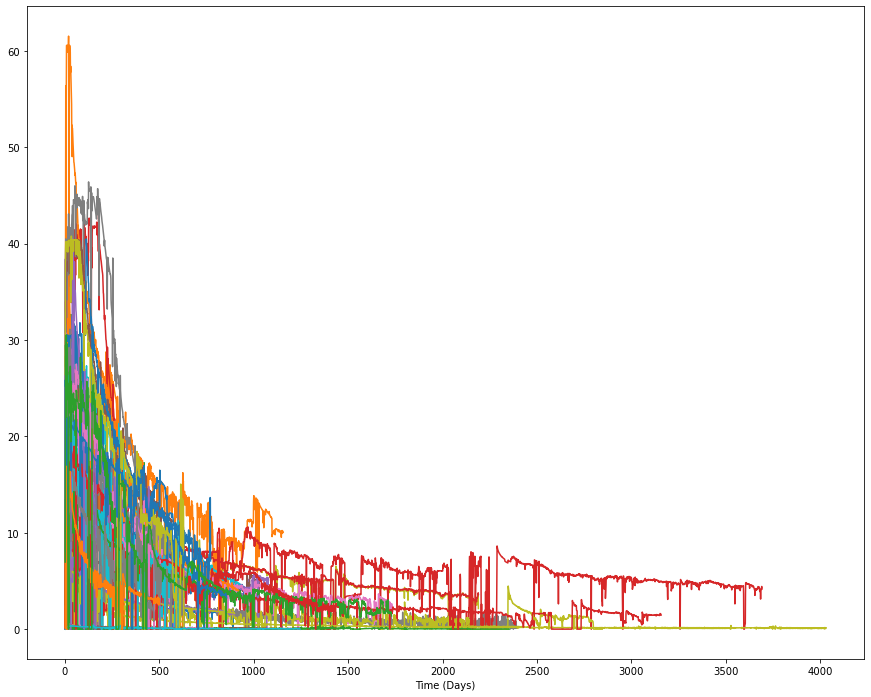

In [145]:
fig, ax = plt.subplots(figsize=(15,12))
production_data.groupby(level=0).plot.line(x='Time (Days)', y='Gas Volume (MMscf)', ax=ax, legend=False);

Пример скважины:

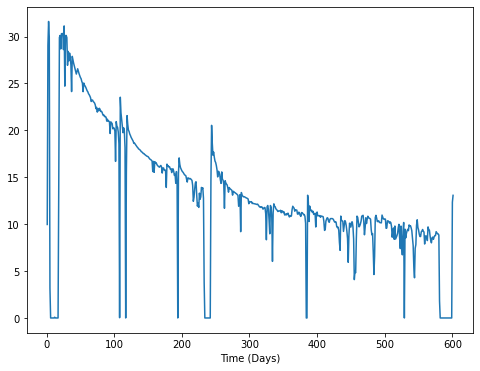

In [146]:
fig, ax = plt.subplots(figsize=(8,6))
production_data.loc['PEACOCK', :].plot.line(x='Time (Days)', y='Gas Volume (MMscf)', ax=ax, legend=False);

Смотрим, какие скважины давали только газ или только нефть.

In [147]:
production_data.groupby(level=0)\
    .agg({'Gas Volume (MMscf)': 'sum', 'Oil Volume (stb)': 'sum'})

Gas Volume (MMscf)  Oil Volume (stb)
Lease                                              
ALBATROSS             2520.947870          0.000000
ARCHAEOPTERYX        11694.297790          0.000000
AVOCET                8602.082260          0.000000
BEE-EATER            11825.701650          0.000000
BLUEBIRD              7209.051330          0.000000
CANARY                7607.488870          0.000000
CARDINAL               106.091600     115249.591600
CASSOWARY             5817.028610          0.000000
CRANE                14192.400230          0.000000
CROW                    91.475570     128589.460000
CUCKOO               10090.657210          0.000000
DUCK                 20069.655180          0.000000
EAGLE                  179.921108     422035.633300
EGRET                22038.542480          0.000000
EMU                   9244.322050          0.000000
FALCON                  25.131393     137556.840000
FINCH                 9229.600600          0.000000
FLAMINGO              4129.356030          0.000000
GOOSE                 4086.560070          0.000000
HARPY                11519.088500          0.000000
HAWK                    21.968277     117716.300000
HERON                 7998.197900          0.000000
HUMMINGBIRD           4565.134700          0.000000
IBIS                 14348.130130          0.000000
JAY                     83.272784      81972.320500
KITE                    89.526616      77392.514200
LARK                   135.727615     156762.926000
LOON                 13877.227630          0.000000
LORIKEET              2124.331340          0.000000
MACAW                 4774.527750          0.000000
MYNAH                 8717.243720          0.000000
ORIOLE                9758.085790          0.000000
OSPREY                 104.507032     307404.183852
OSTRICH               8358.232340          0.000000
OWL                   2777.713610          0.000000
PARROT               12563.576580          0.000000
PARTRIDGE             8237.107620          0.000000
PEACOCK               7928.759880          0.000000
PELICAN               2602.984280          0.000000
PENGUIN               5539.480590          0.000000
PHEASANT             13245.631700          0.000000
PHOENIX               2747.872360          0.000000
ROBIN                 7870.010570          0.000000
ROOSTER               9823.206330          0.000000
SEAGULL               7480.721000          0.000000
SPARROW                127.986170     186464.680200
STILT                 7564.309530          0.000000
STORK                 4867.653150          0.000000
SWAN                 11965.488040          0.000000
SWIFT                  119.658310     183855.250000
TERN                 10881.231060          0.000000
TOUCAN                2599.980600          0.000000
WARBLER               9237.807300          0.000000

Газ у всех. Нефтяных мало. Добавляю признак "есть нефть" к описанию скважин.

In [3]:
oil_producers = production_data.groupby(level=0)\
    .agg({'Oil Volume (stb)': 'sum'})\
    .rename(columns={'Oil Volume (stb)': 'oil_producer'})\
    .apply(lambda x: x != 0.0)

In [4]:
oil_producers.sum()

oil_producer    11
dtype: int64

Всего 11 скважин из 53

In [10]:
oil_producers_list = oil_producers[oil_producers.oil_producer].index.to_list()
oil_producers_list

['CARDINAL',
 'CROW',
 'EAGLE',
 'FALCON',
 'HAWK',
 'JAY',
 'KITE',
 'LARK',
 'OSPREY',
 'SPARROW',
 'SWIFT']

In [151]:
well_data = well_data.join(oil_producers); well_data

Formation/Reservoir   Initial Pressure Estimate (psi)   \
OSPREY                 EAGLE FORD                               5400   
FALCON                 EAGLE FORD                               5700   
HAWK                   EAGLE FORD                               5650   
EAGLE                  EAGLE FORD                               5000   
KITE                   EAGLE FORD                               5000   
SWIFT                  EAGLE FORD                               5164   
SPARROW                EAGLE FORD                               5164   
LARK                   EAGLE FORD                               5700   
CARDINAL               EAGLE FORD                               5900   
JAY                    EAGLE FORD                               5700   
CROW                   EAGLE FORD                               5500   
LORIKEET        HAYNESVILLE SHALE                               9939   
MYNAH           HAYNESVILLE SHALE                               9800   
PARTRIDGE       HAYNESVILLE SHALE                               9900   
CASSOWARY       HAYNESVILLE SHALE                              12223   
ORIOLE          HAYNESVILLE SHALE                              11325   
WARBLER         HAYNESVILLE SHALE                              11000   
HARPY           HAYNESVILLE SHALE                              11325   
BEE-EATER       HAYNESVILLE SHALE                              10000   
LOON            HAYNESVILLE SHALE                              10000   
CUCKOO             BOSSIER SHALE                               10500   
ROOSTER         HAYNESVILLE SHALE                              10500   
ARCHAEOPTERYX   HAYNESVILLE SHALE                              10300   
TERN            HAYNESVILLE SHALE                              10450   
STILT           HAYNESVILLE SHALE                              10800   
AVOCET          HAYNESVILLE SHALE                              11000   
OSTRICH                 MARCELLUS                               3486   
EMU                     MARCELLUS                               5531   
DUCK                    MARCELLUS                               3900   
HERON                   MARCELLUS                               3500   
STORK                   MARCELLUS                               3000   
SWAN                    MARCELLUS                               4500   
PARROT                  MARCELLUS                               4750   
CRANE                   MARCELLUS                               5538   
IBIS                    MARCELLUS                               5508   
EGRET                   MARCELLUS                               5227   
PHEASANT                MARCELLUS                               4450   
MACAW           MARCELLUS - UPPER                               4609   
FLAMINGO        MARCELLUS - UPPER                               4500   
PEACOCK         MARCELLUS - UPPER                               3150   
PENGUIN         MARCELLUS - UPPER                               3400   
ALBATROSS       MARCELLUS - UPPER                               5000   
PELICAN         MARCELLUS - UPPER                               2500   
OWL             MARCELLUS - UPPER                               2200   
FINCH           MARCELLUS - UPPER                               4300   
ROBIN           MARCELLUS - UPPER                               4100   
BLUEBIRD        MARCELLUS - UPPER                               4200   
CANARY          MARCELLUS - UPPER                               4300   
SEAGULL         MARCELLUS - UPPER                               4400   
HUMMINGBIRD     MARCELLUS - UPPER                               4000   
PHOENIX         MARCELLUS - UPPER                               4450   
TOUCAN          MARCELLUS - UPPER                               3900   
GOOSE           MARCELLUS - UPPER                               5200   

                Reservoir Temperature (deg F)    Net Pay (ft)   \
OSPREY                                     225             

## Скважины со сложной историей

Отбираем те, у которых было минимум 2 изменения

In [152]:
well_data[[' Configuration Change (Days Since First Prod) ',
           ' Configuration Change (Days Since First Prod) .1']]\
                .dropna(how='any')

Configuration Change (Days Since First Prod)   \
OSPREY                                              64.0   
FALCON                                              61.0   
HAWK                                                40.0   
SWIFT                                              144.0   
SPARROW                                            156.0   
LARK                                               122.0   
CARDINAL                                           119.0   
JAY                                                132.0   
CROW                                                24.0   

           Configuration Change (Days Since First Prod) .1  
OSPREY                                              1101.0  
FALCON                                               123.0  
HAWK                                                 125.0  
SWIFT                                                896.0  
SPARROW                                              887.0  
LARK                                                 438.0  
CARDINAL                                             486.0  
JAY                                                  480.0  
CROW                                                 216.0

In [153]:
wells_w_2changes = well_data[[' Configuration Change (Days Since First Prod) ',
                               ' Configuration Change (Days Since First Prod) .1']]\
                                    .dropna(how='any').index.to_list()
wells_w_2changes

['OSPREY',
 'FALCON',
 'HAWK',
 'SWIFT',
 'SPARROW',
 'LARK',
 'CARDINAL',
 'JAY',
 'CROW']

Красные вертикальные линии - точки внесения изменений согласно файлу well_data.csv

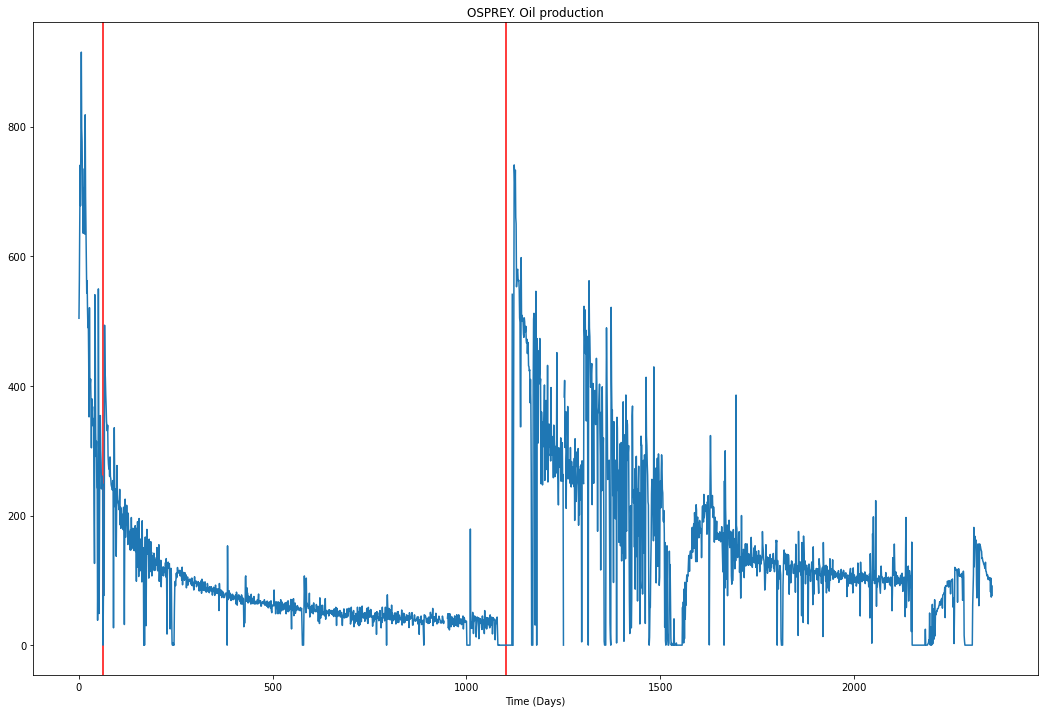

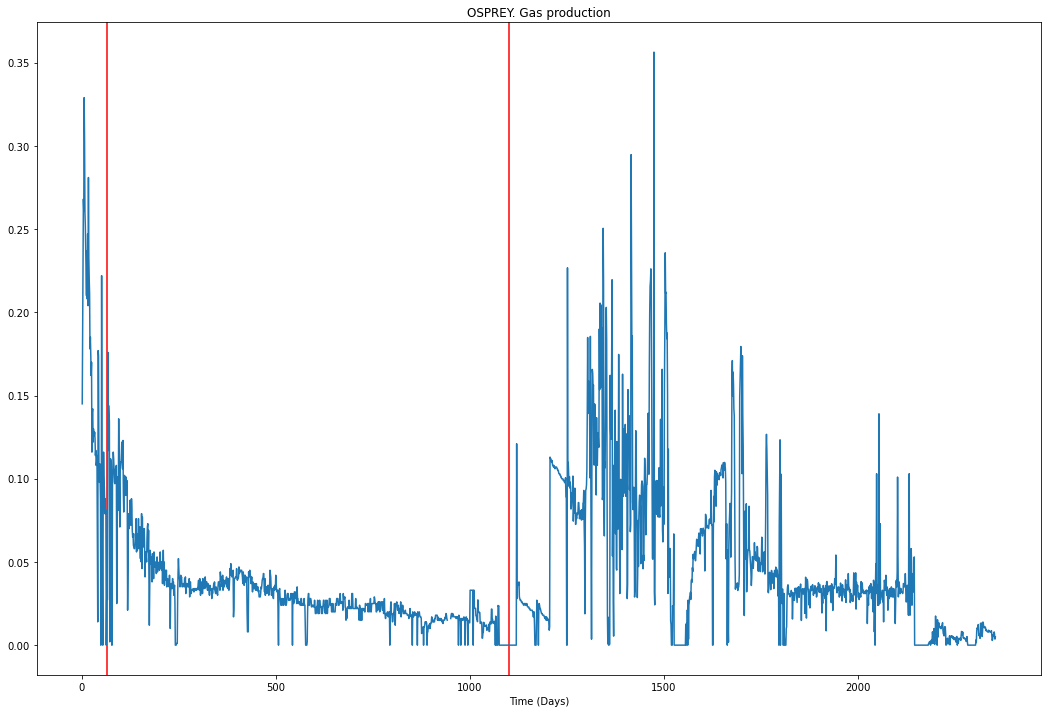

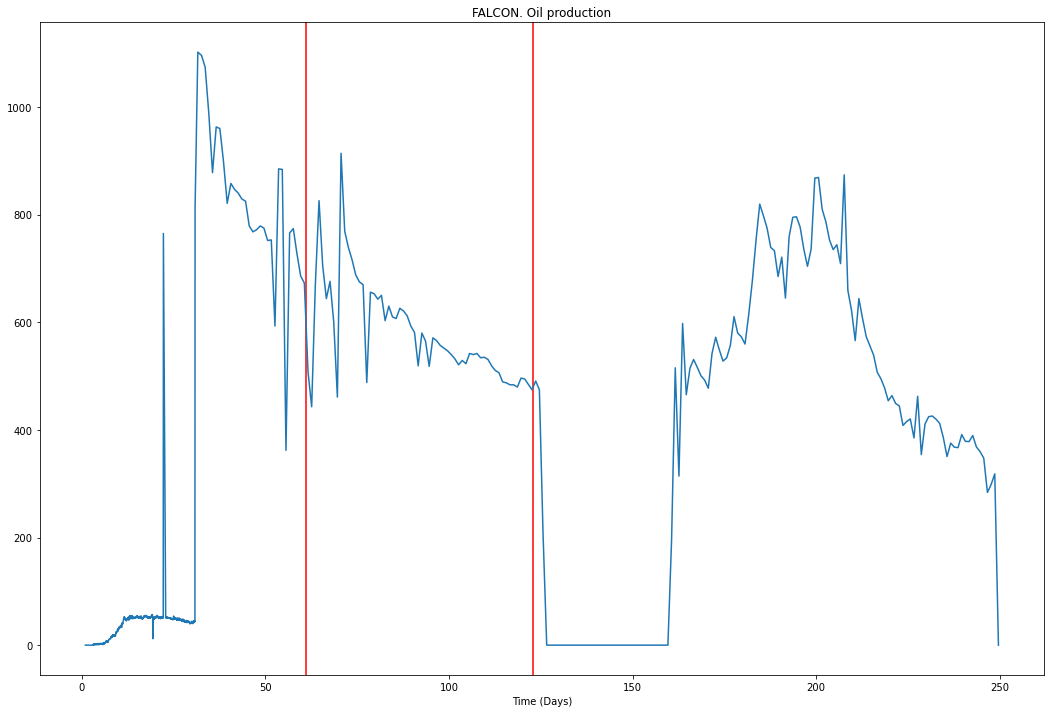

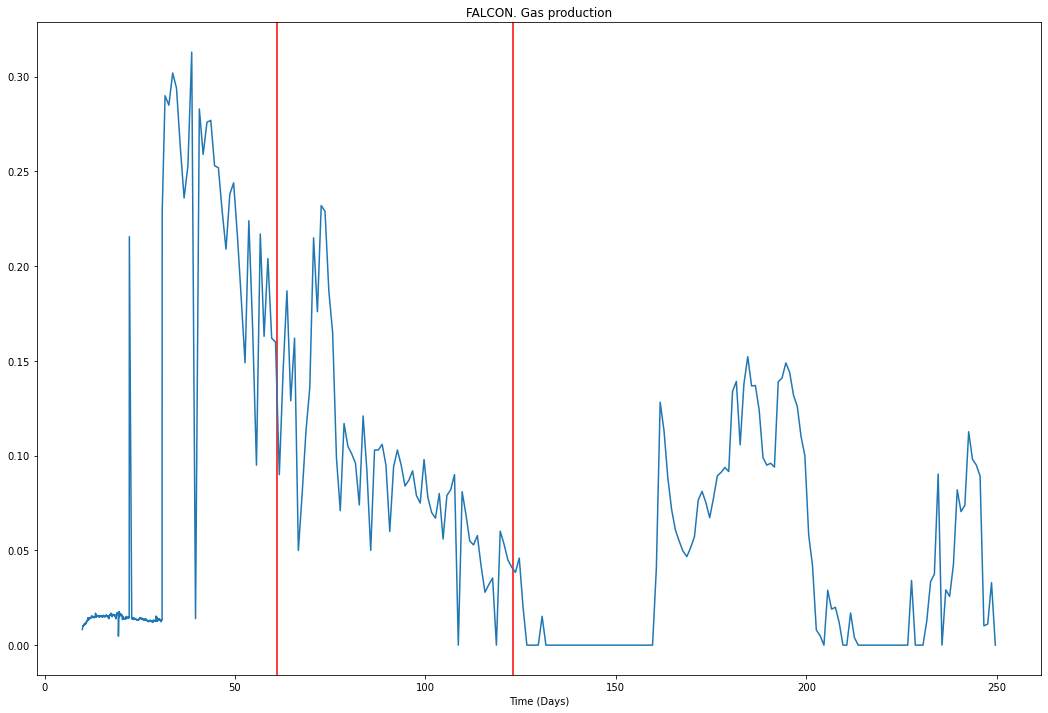

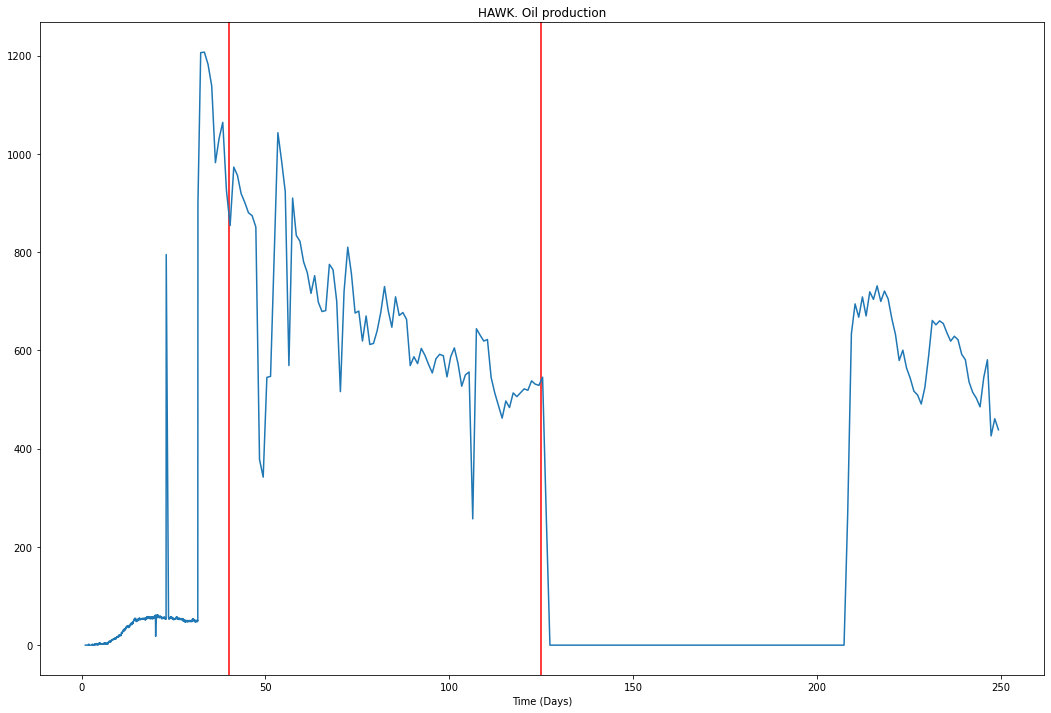

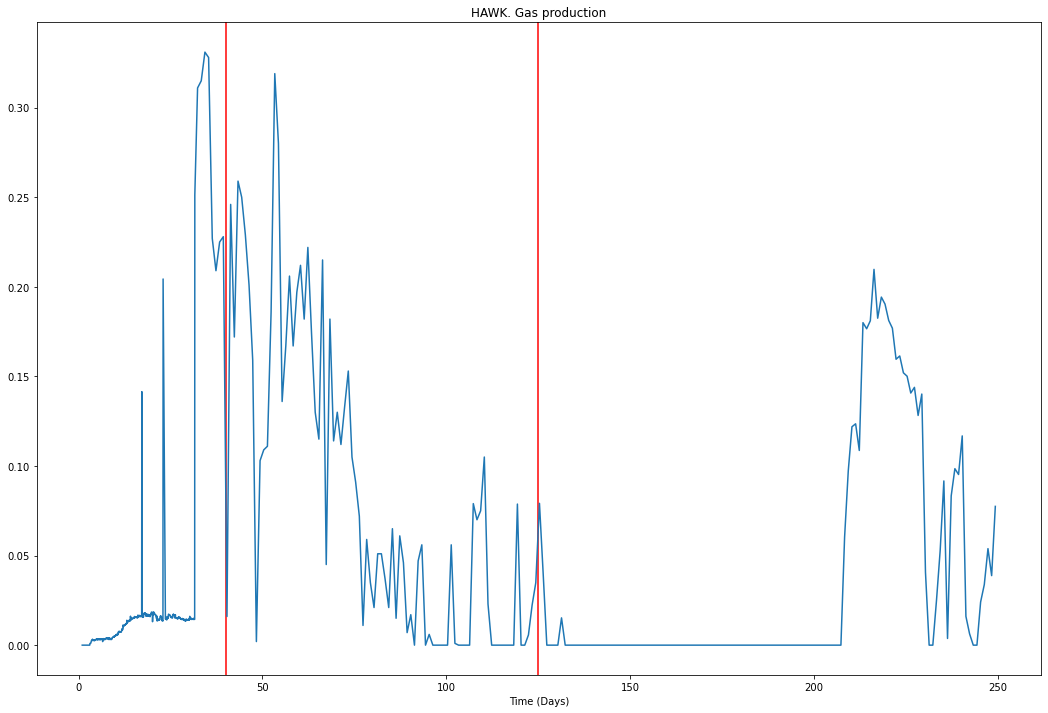

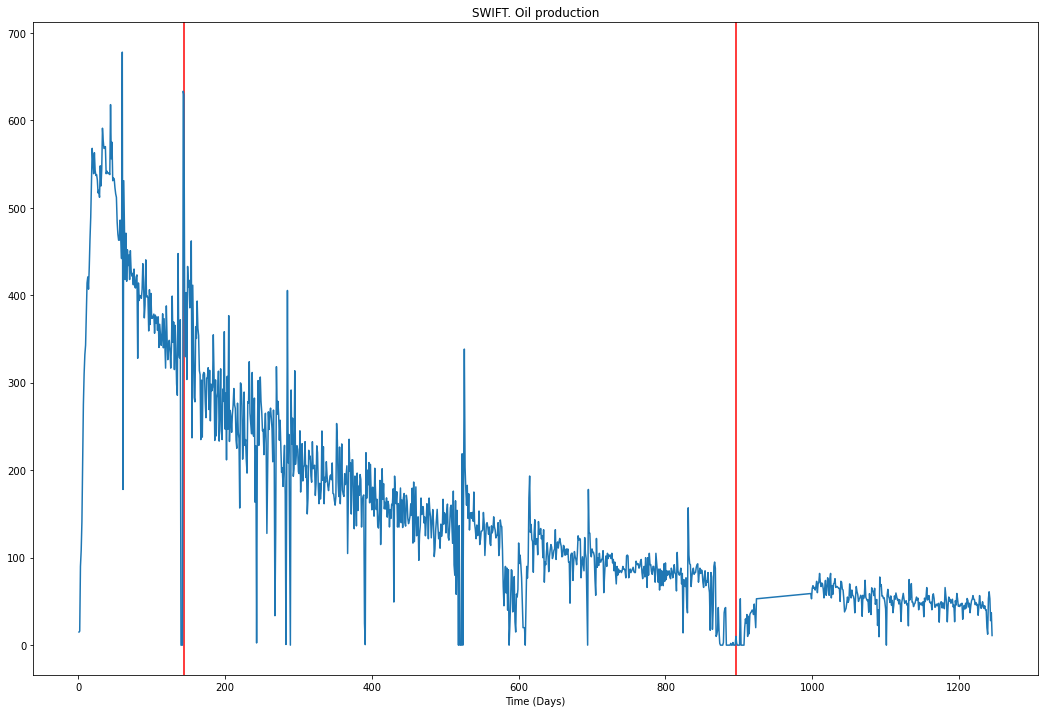

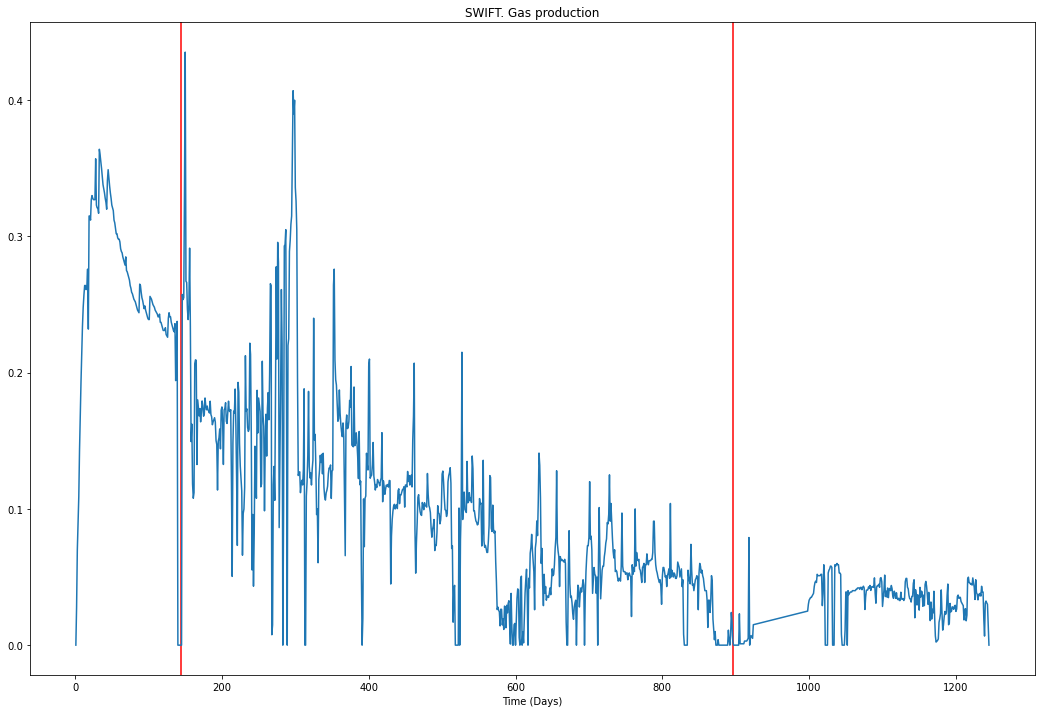

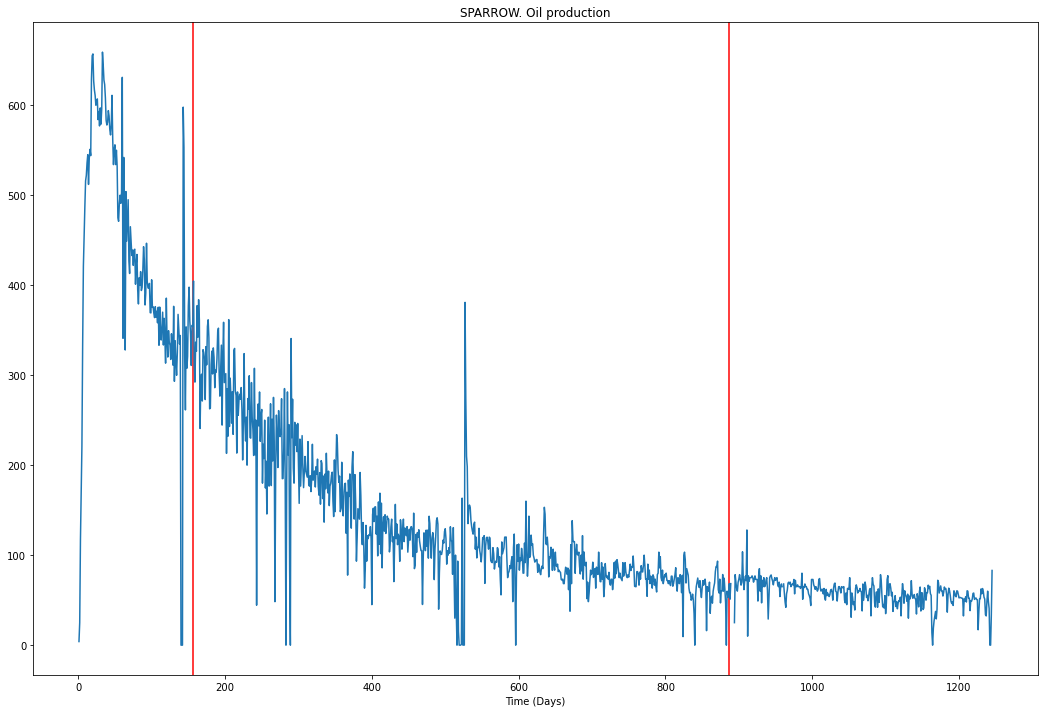

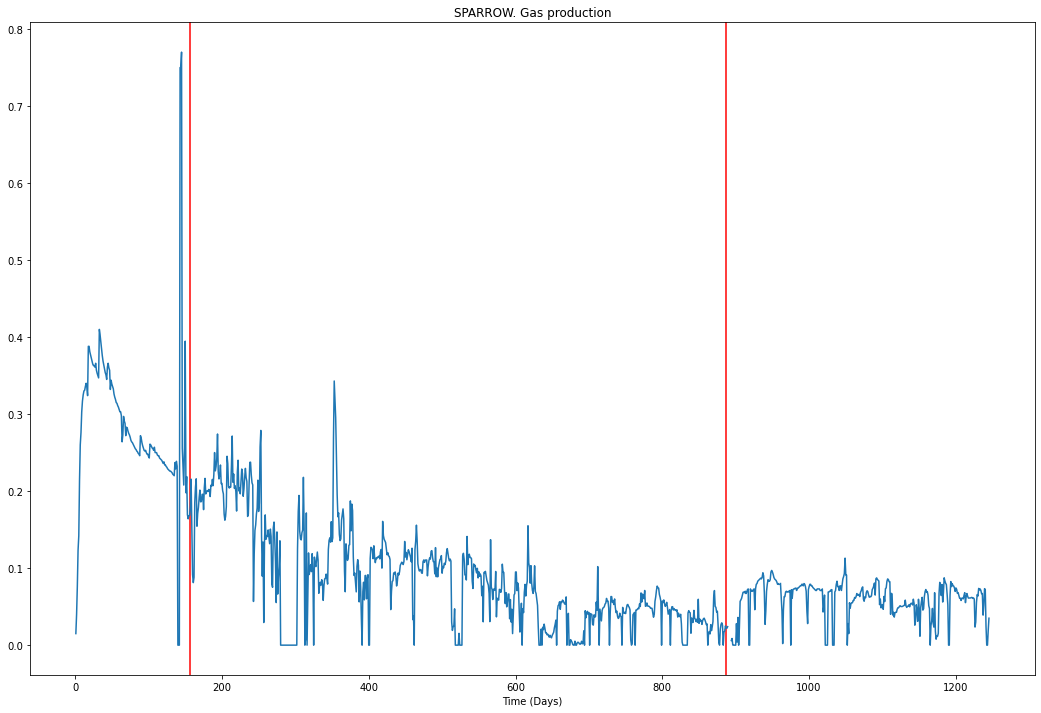

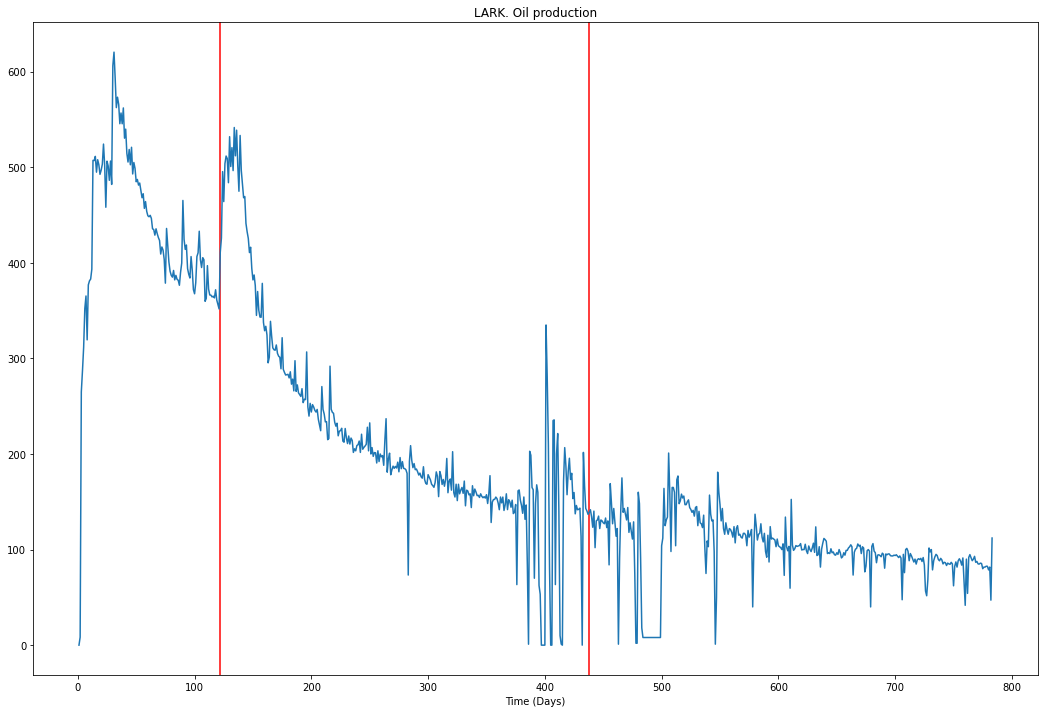

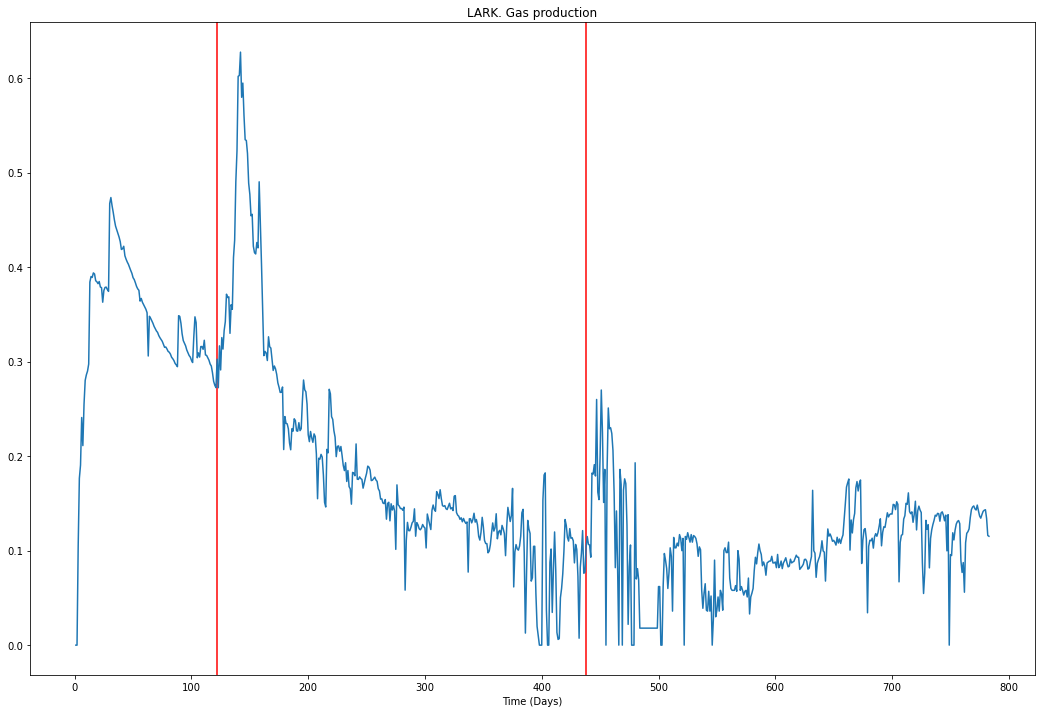

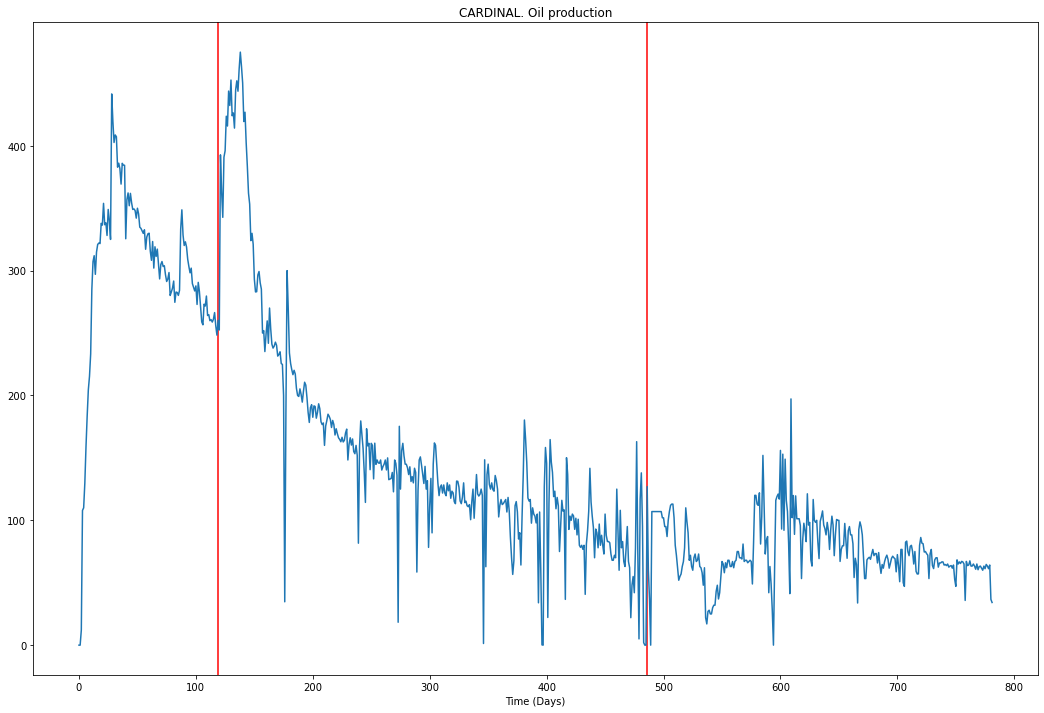

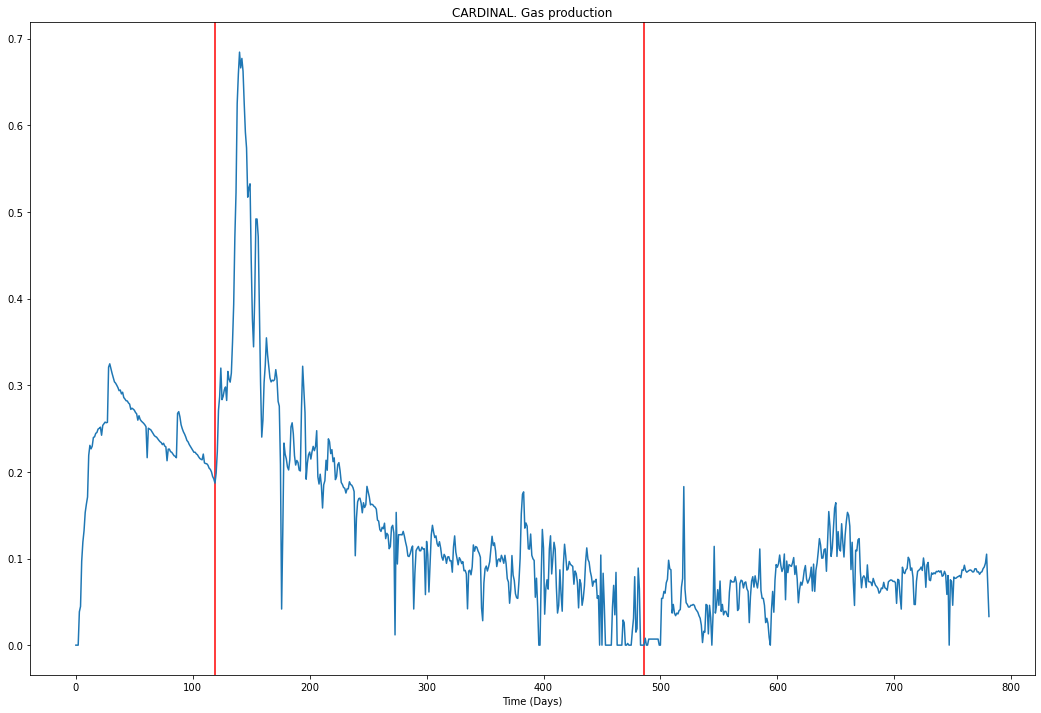

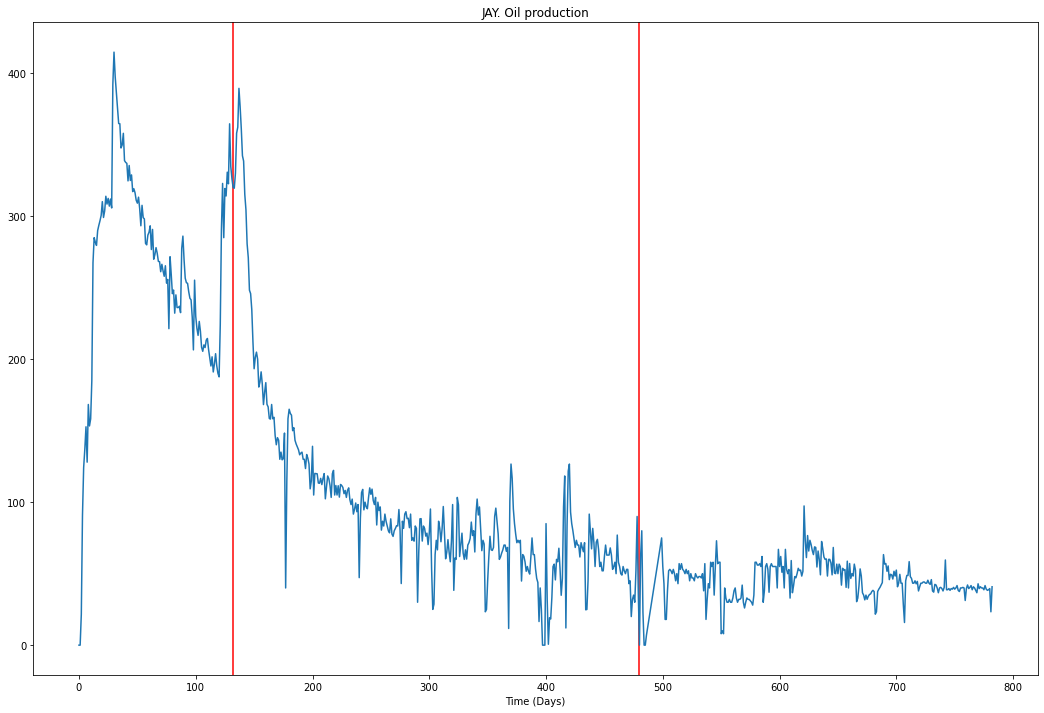

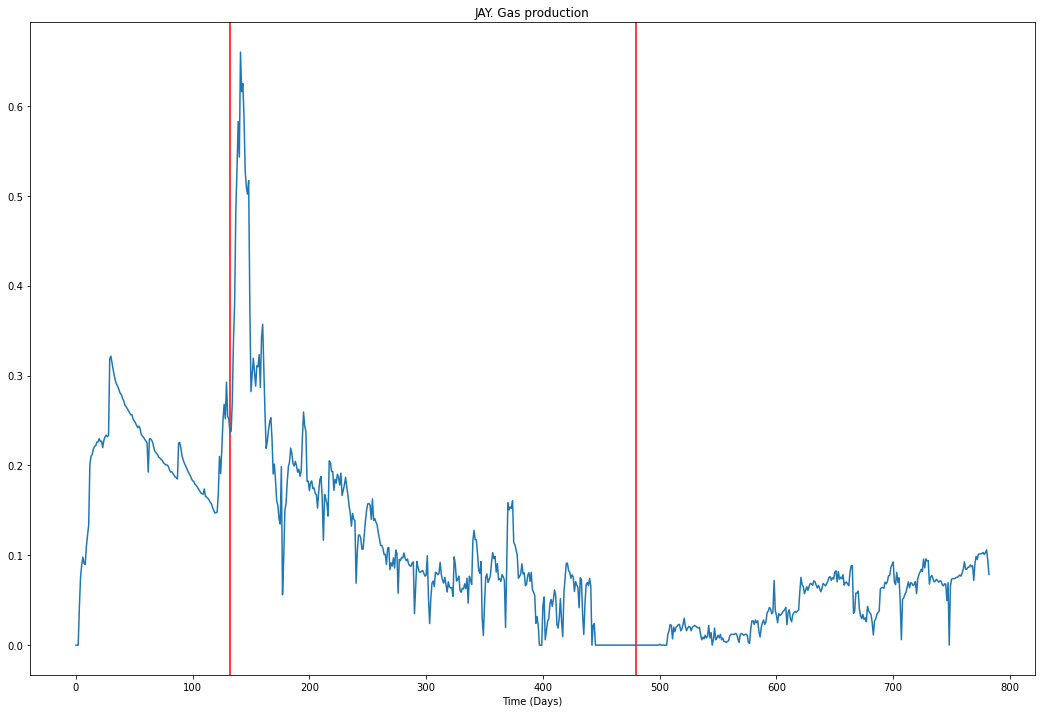

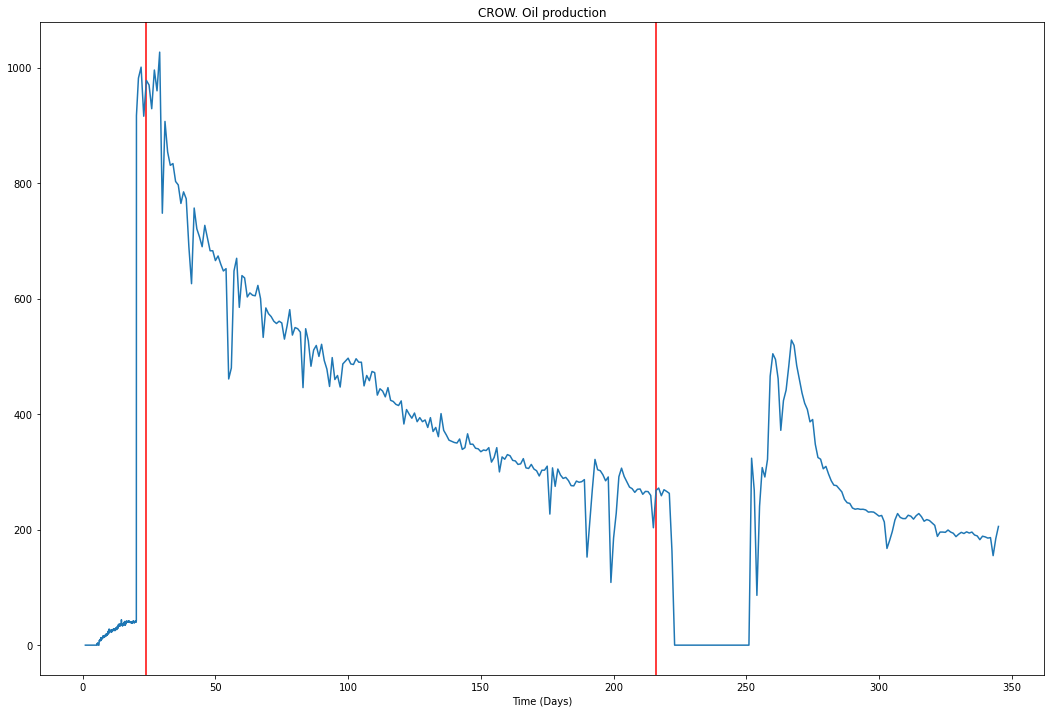

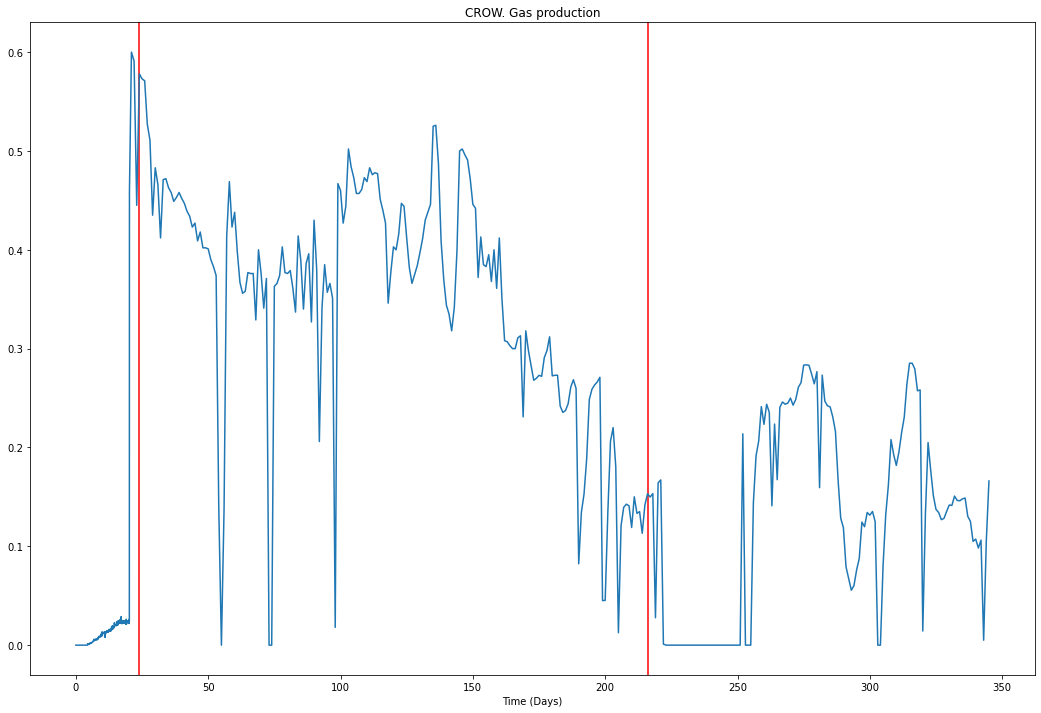

In [154]:
for well in wells_w_2changes:
    fig, ax = plt.subplots(figsize=(18,12))
    ax.axvline(well_data.loc[well, ' Configuration Change (Days Since First Prod) '], color='r')
    ax.axvline(well_data.loc[well, ' Configuration Change (Days Since First Prod) .1'], color='r')
    production_data.loc[well, :].plot.line(x='Time (Days)',
                                               y='Oil Volume (stb)',
                                               ax=ax, 
                                               legend=False,
                                              title='{}. Oil production'.format(well))
    plt.show();
    
    fig, ax = plt.subplots(figsize=(18,12))
    ax.axvline(well_data.loc[well, ' Configuration Change (Days Since First Prod) '], color='r')
    ax.axvline(well_data.loc[well, ' Configuration Change (Days Since First Prod) .1'], color='r')
    production_data.loc[well, :].plot.line(x='Time (Days)',
                                               y='Gas Volume (MMscf)',
                                               ax=ax, 
                                               legend=False,
                                              title='{}. Gas production'.format(well))
    plt.show();

Варианты: использовать только интервал между нулевым и первым измененим конструкции или делить на части и использовать каждую часть как отдельную кривую. Интервал до нулевого изменения, как правило, очень короткий и малоинформативный.

Отбираем скважины, у которых было только 1 изменение

In [155]:
well_data[[' Configuration Change (Days Since First Prod) ',
           ' Configuration Change (Days Since First Prod) .1']]\
                .dropna(how='all')\
                .loc[well_data[' Configuration Change (Days Since First Prod) .1'].isna()]

Configuration Change (Days Since First Prod)   \
EAGLE                                              205.0   
KITE                                               111.0   
LORIKEET                                            50.0   
ORIOLE                                             429.0   
WARBLER                                            429.0   
HARPY                                              431.0   
CUCKOO                                             426.0   
EMU                                                236.0   
PELICAN                                            421.0   
OWL                                                424.0   
BLUEBIRD                                           381.0   
CANARY                                             381.0   
PHOENIX                                            306.0   
TOUCAN                                             305.0   

           Configuration Change (Days Since First Prod) .1  
EAGLE                                                  NaN  
KITE                                                   NaN  
LORIKEET                                               NaN  
ORIOLE                                                 NaN  
WARBLER                                                NaN  
HARPY                                                  NaN  
CUCKOO                                                 NaN  
EMU                                                    NaN  
PELICAN                                                NaN  
OWL                                                    NaN  
BLUEBIRD                                               NaN  
CANARY                                                 NaN  
PHOENIX                                                NaN  
TOUCAN                                                 NaN

In [156]:
wells_w_1change = well_data[[' Configuration Change (Days Since First Prod) ',
                           ' Configuration Change (Days Since First Prod) .1']]\
                                .dropna(how='all')\
                                .loc[well_data[' Configuration Change (Days Since First Prod) .1'].isna()]\
                                        .index\
                                        .to_list()
wells_w_1change

['EAGLE',
 'KITE',
 'LORIKEET',
 'ORIOLE',
 'WARBLER',
 'HARPY',
 'CUCKOO',
 'EMU',
 'PELICAN',
 'OWL',
 'BLUEBIRD',
 'CANARY',
 'PHOENIX',
 'TOUCAN']

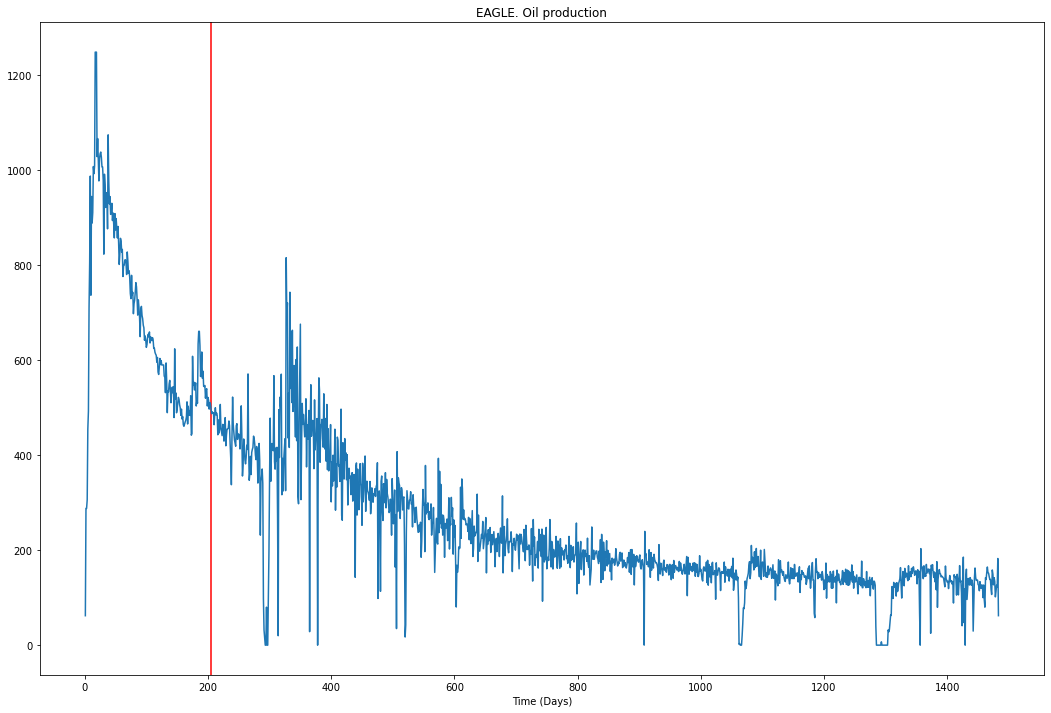

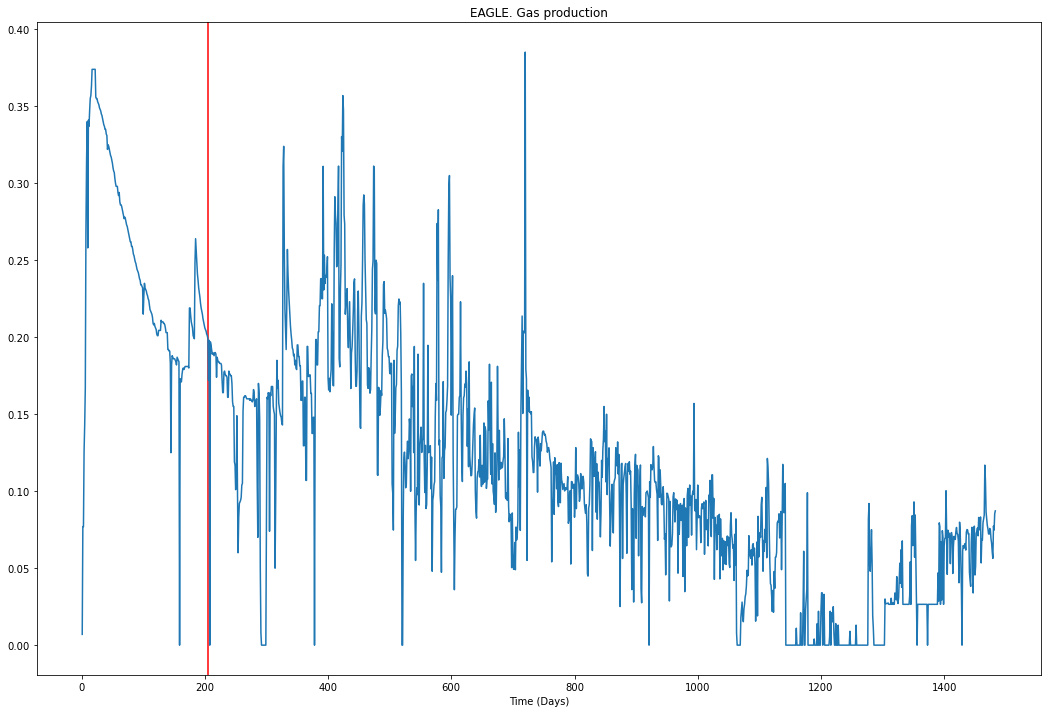

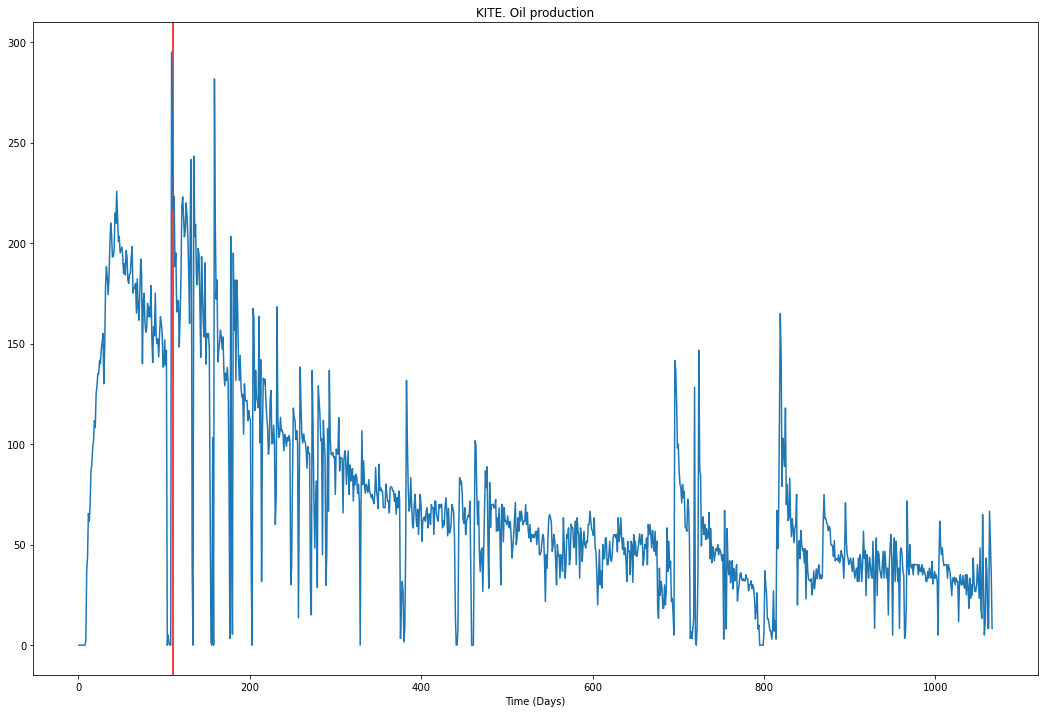

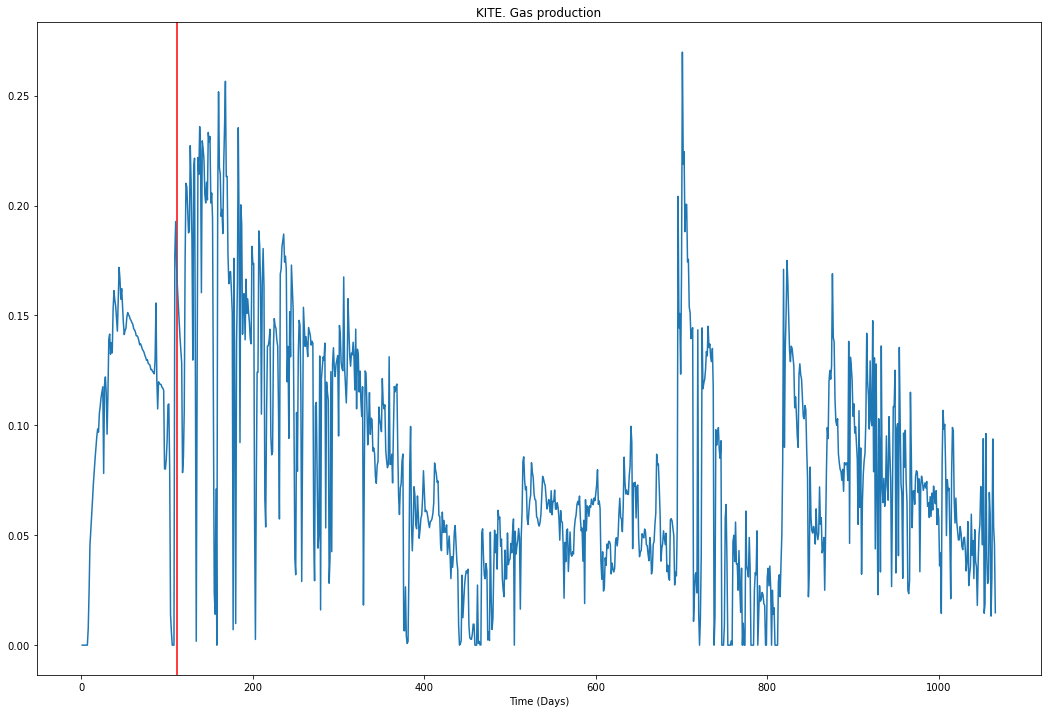

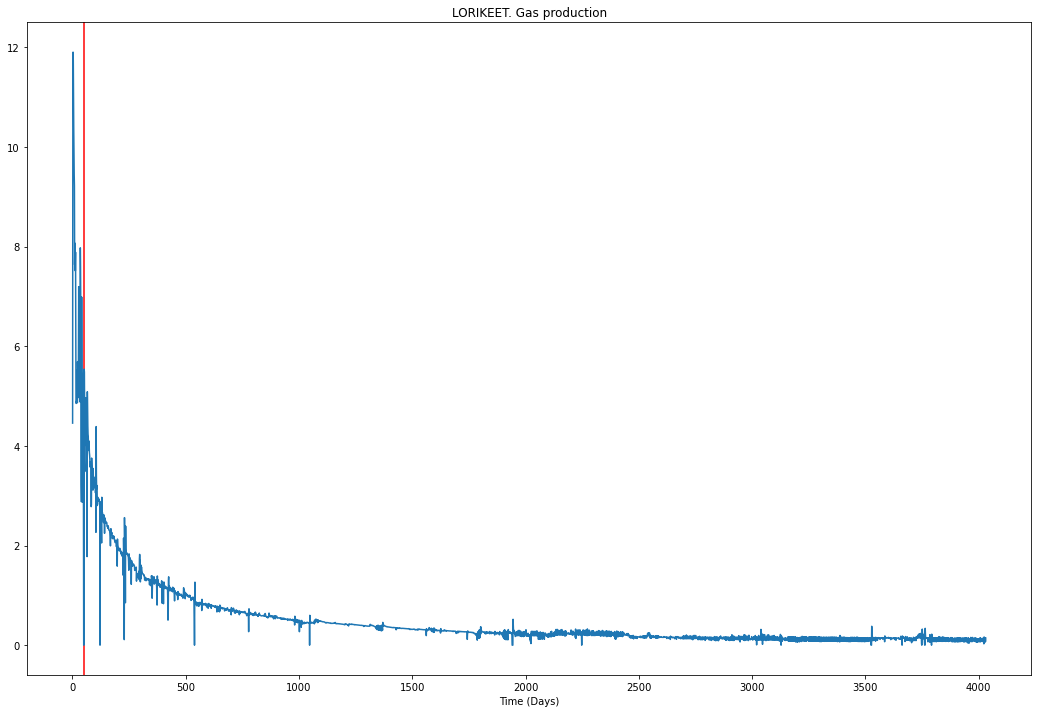

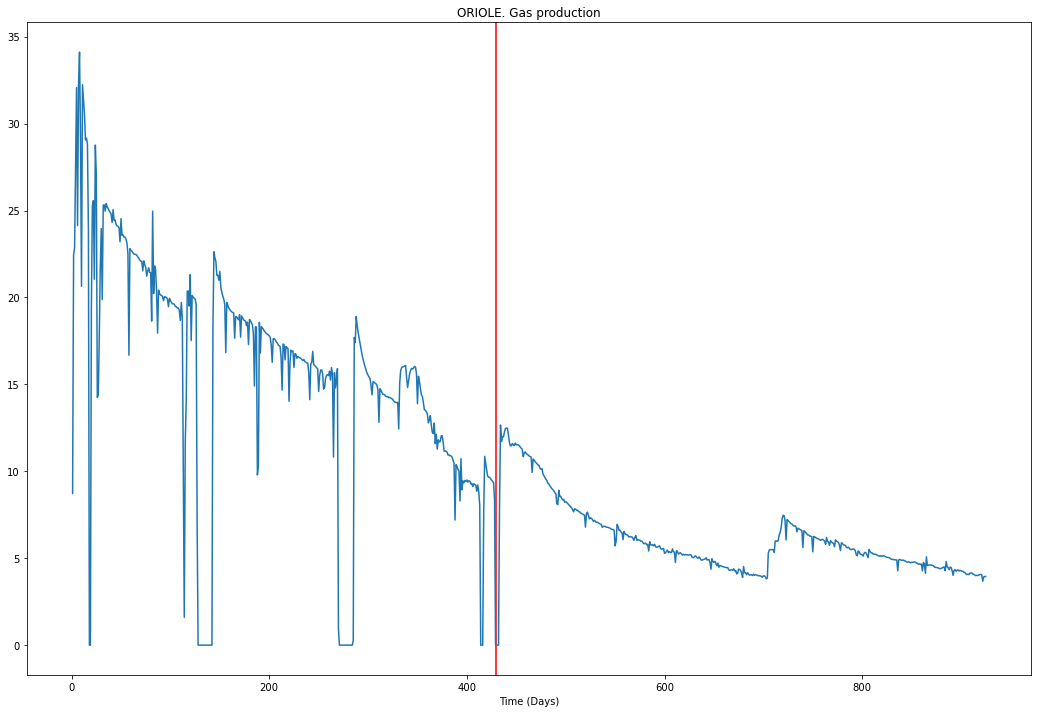

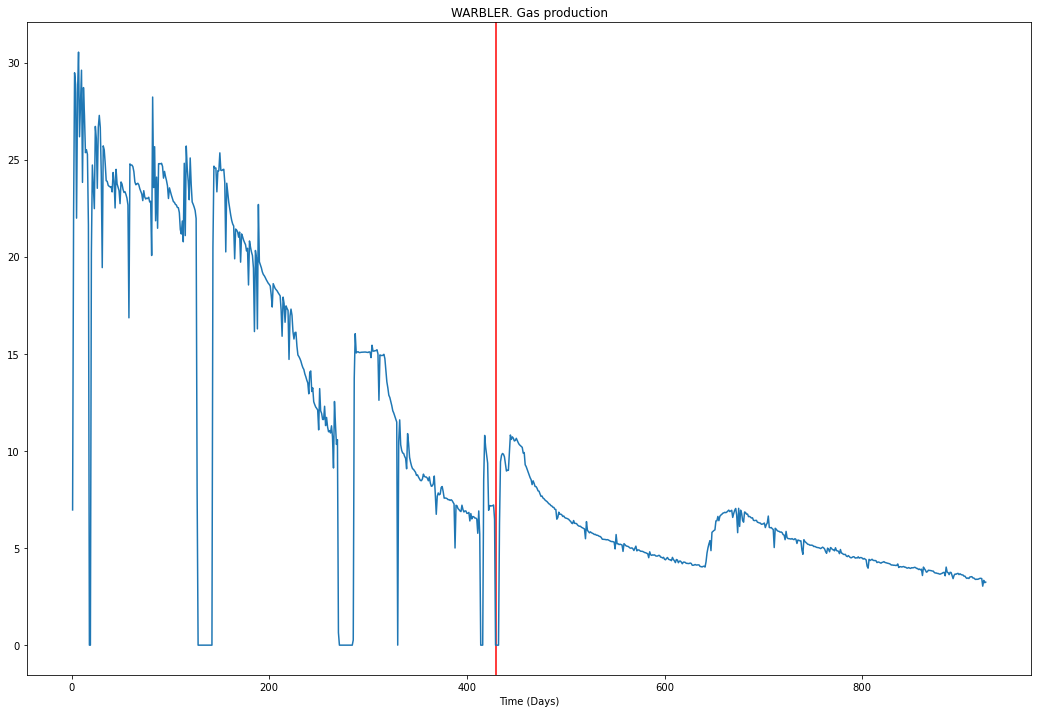

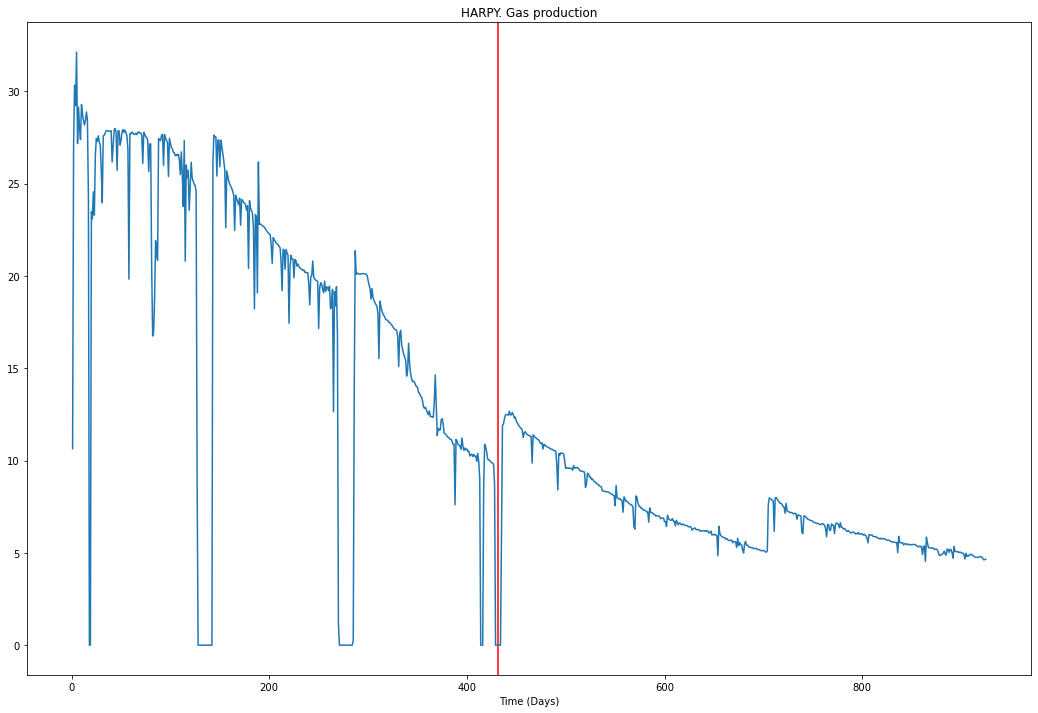

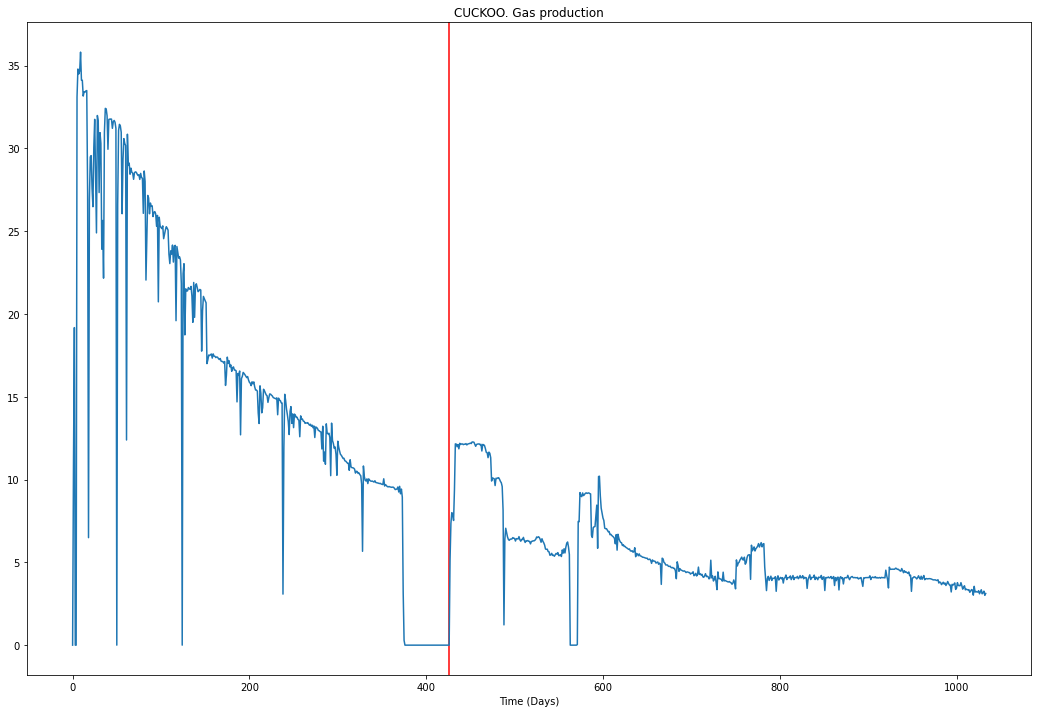

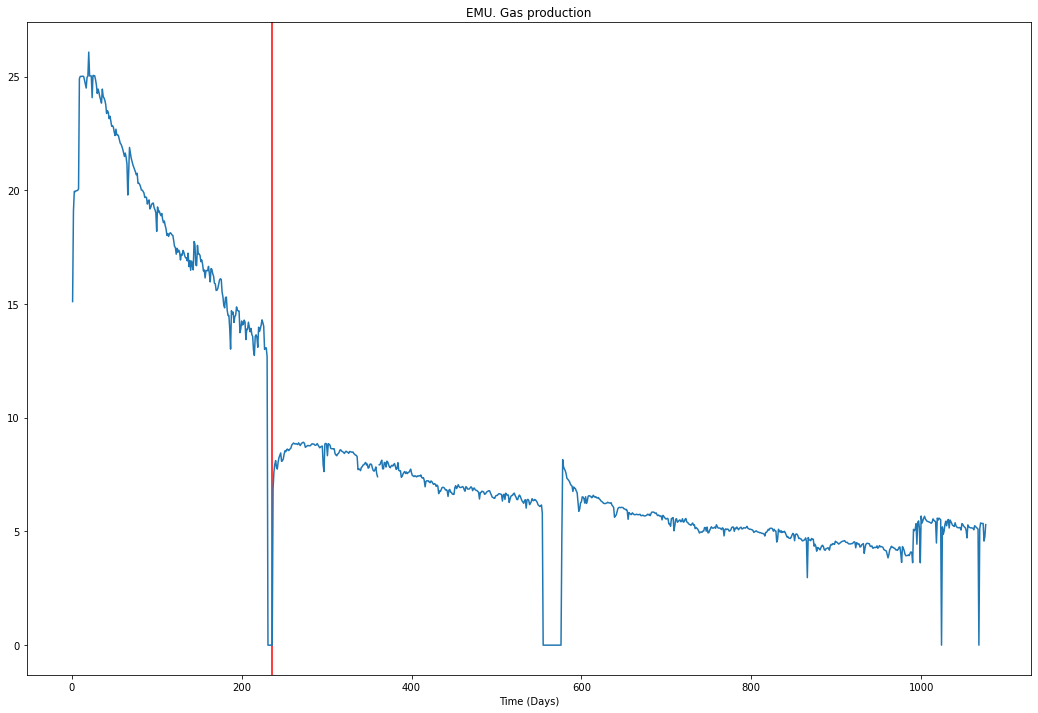

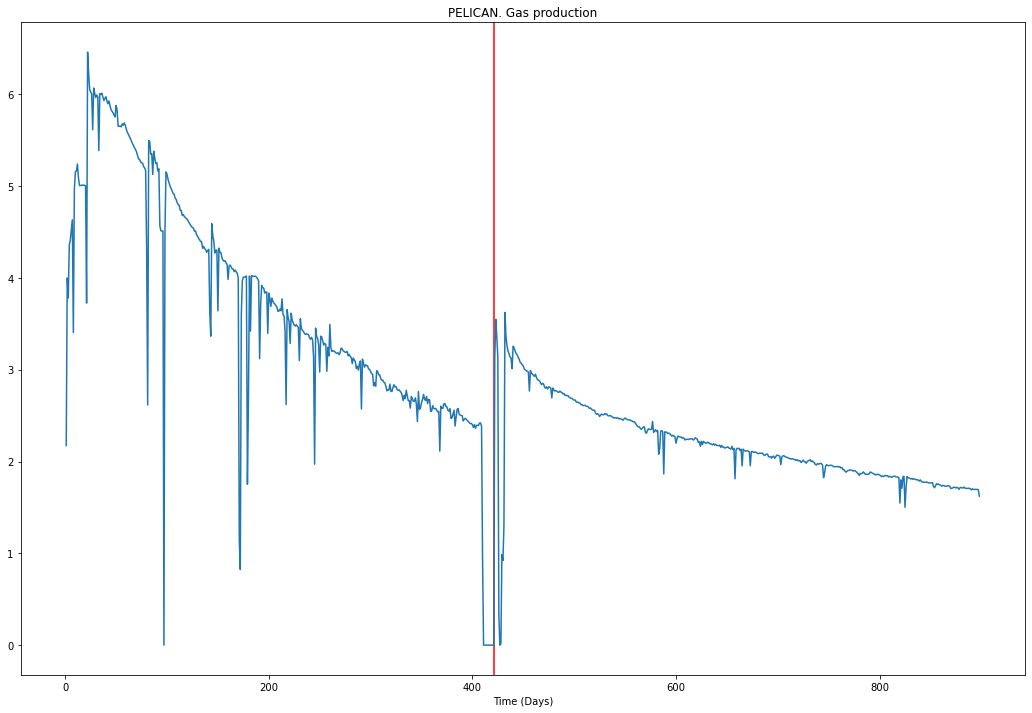

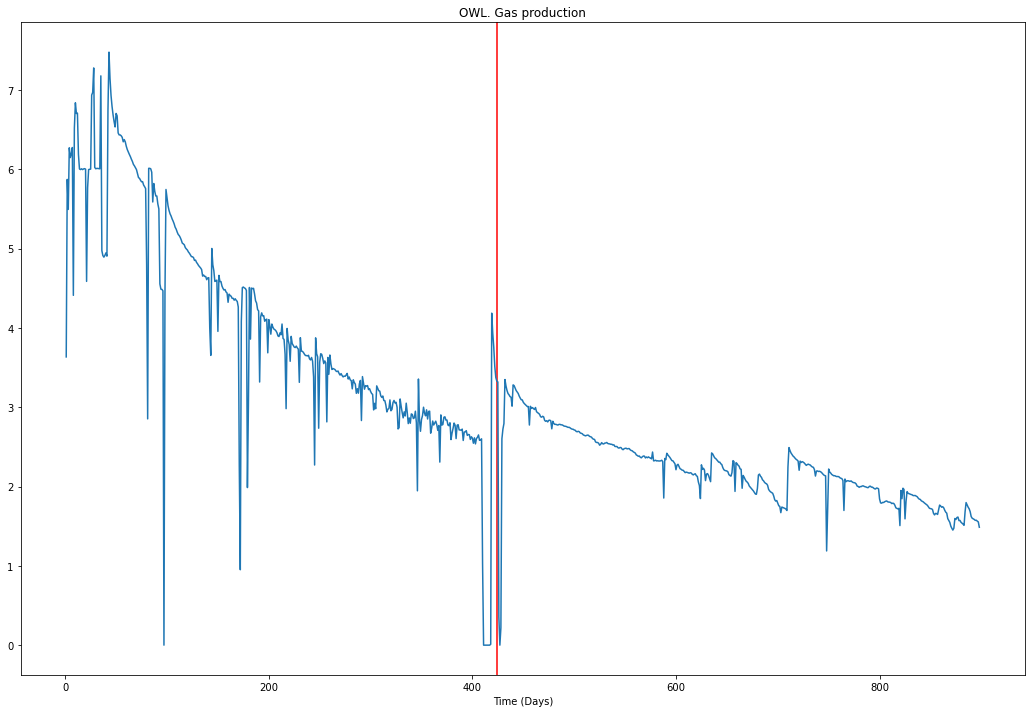

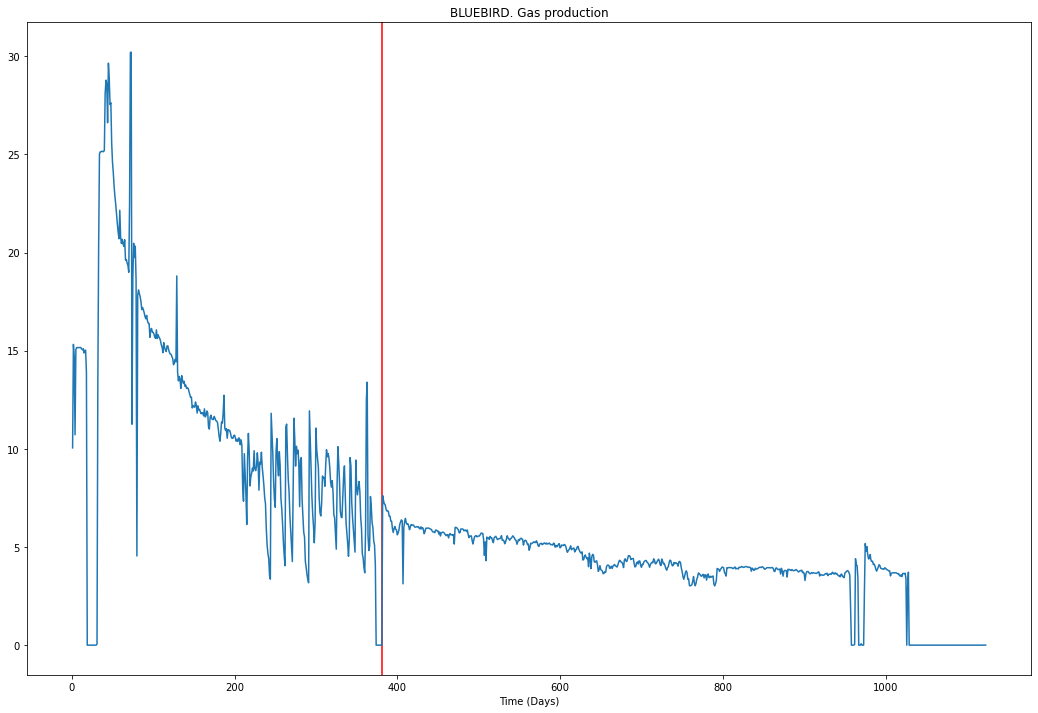

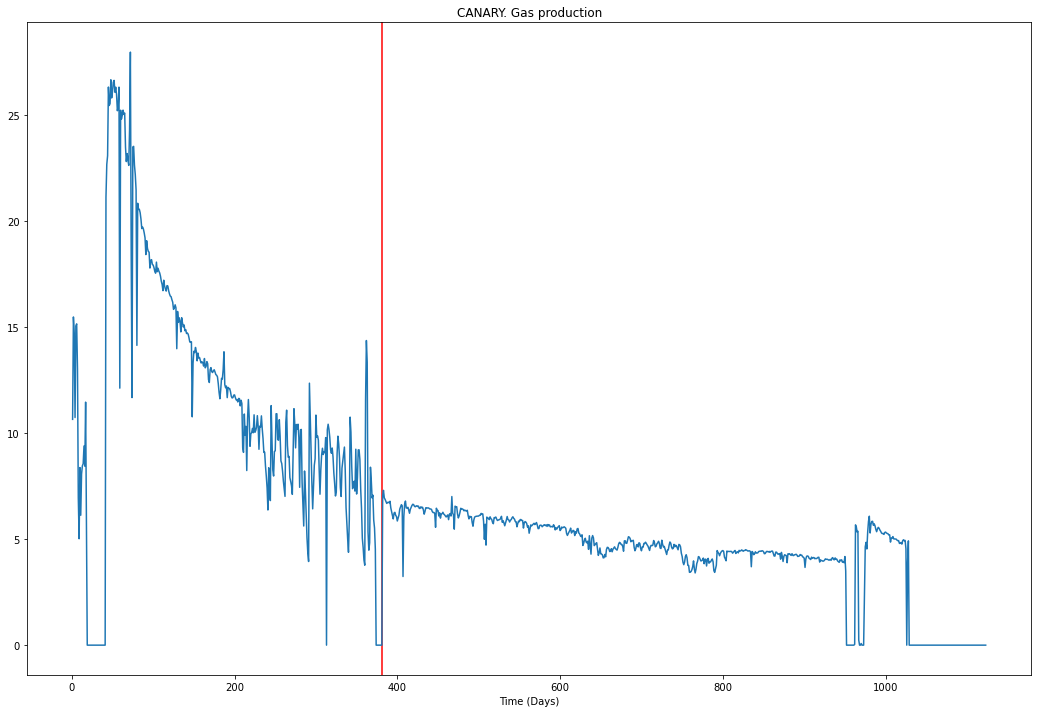

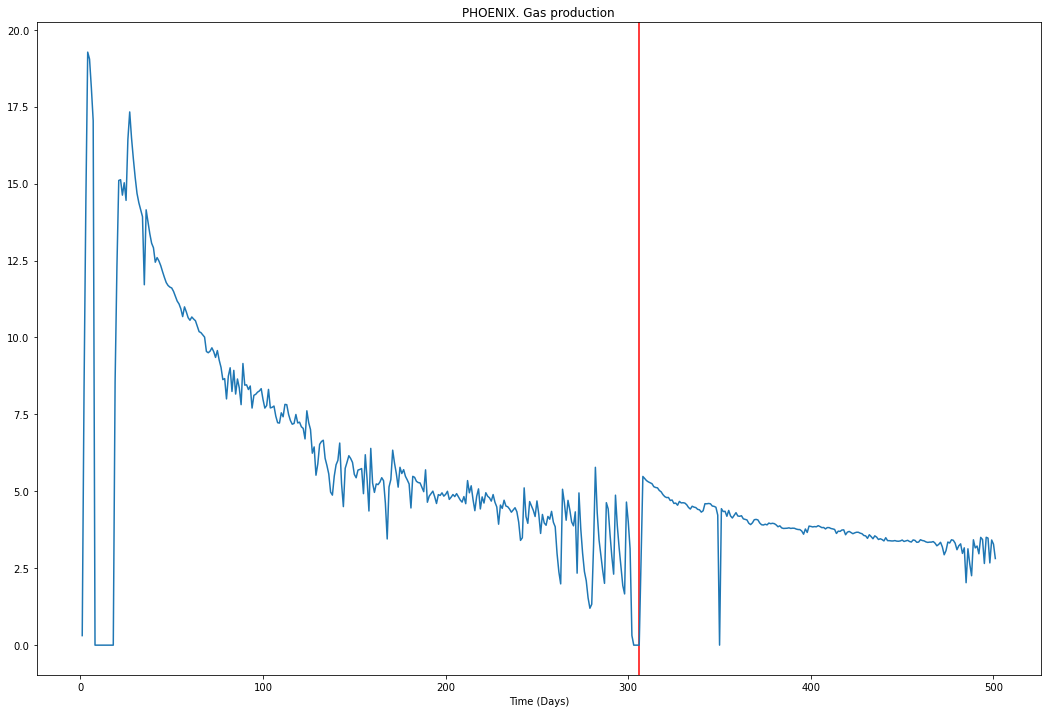

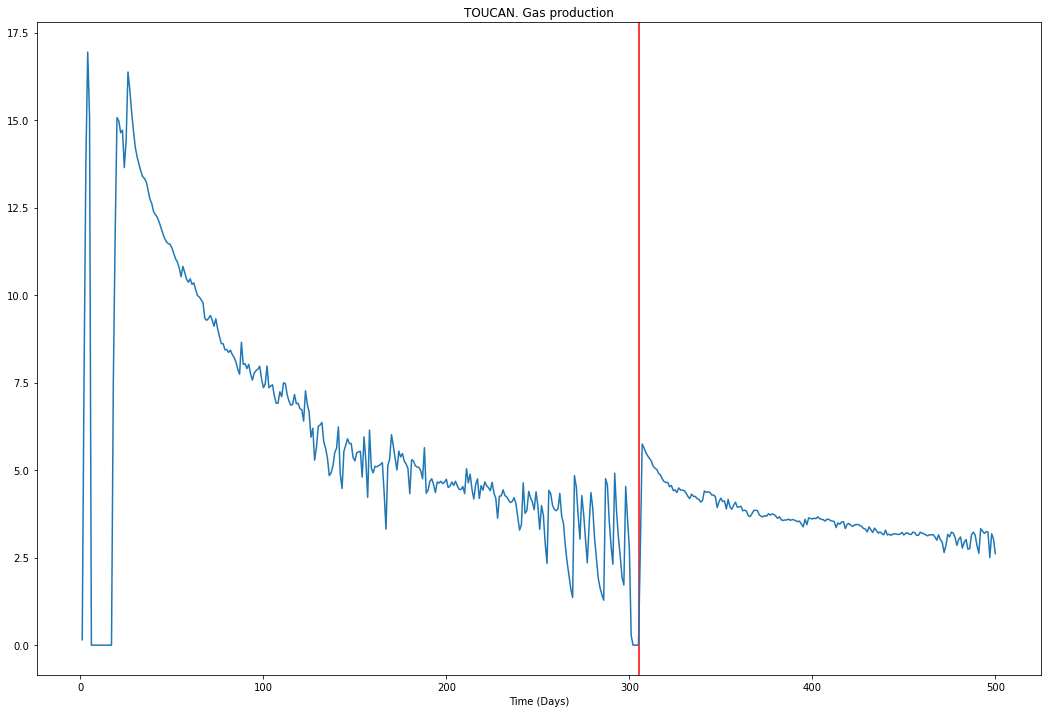

In [157]:
for well in wells_w_1change:
    if well in oil_producers_list:
        fig, ax = plt.subplots(figsize=(18,12))
        ax.axvline(well_data.loc[well, ' Configuration Change (Days Since First Prod) '], color='r')
        production_data.loc[well, :].plot.line(x='Time (Days)',
                                                   y='Oil Volume (stb)',
                                                   ax=ax, 
                                                   legend=False,
                                                  title='{}. Oil production'.format(well))
        plt.show();
    
    fig, ax = plt.subplots(figsize=(18,12))
    ax.axvline(well_data.loc[well, ' Configuration Change (Days Since First Prod) '], color='r')
    production_data.loc[well, :].plot.line(x='Time (Days)',
                                               y='Gas Volume (MMscf)',
                                               ax=ax, 
                                               legend=False,
                                              title='{}. Gas production'.format(well))
    plt.show();

Возможный вариант: для всех скважин с любым числом изменений делить на временные интервалы между изменениями и отбрасывать слишком короткие, допустим менее 100 дней.

# Инклинометрия

In [158]:
deviation_survey = pd.read_csv('deviation_survey.csv', index_col='Lease'); deviation_survey

Measured Depth (ft)  TVD (ft)
Lease                                
OSPREY                  0.0      0.00
OSPREY                 95.1     95.10
OSPREY                153.6    153.60
OSPREY                214.8    214.80
OSPREY                273.1    273.10
...                     ...       ...
GOOSE               12211.0   7308.58
GOOSE               12275.0   7309.42
GOOSE               12338.0   7309.80
GOOSE               12384.0   7309.41
GOOSE               12442.0   7308.61

[76984 rows x 2 columns]

In [159]:
deviation_survey.columns

Index(['Measured Depth (ft)', 'TVD (ft)'], dtype='object')

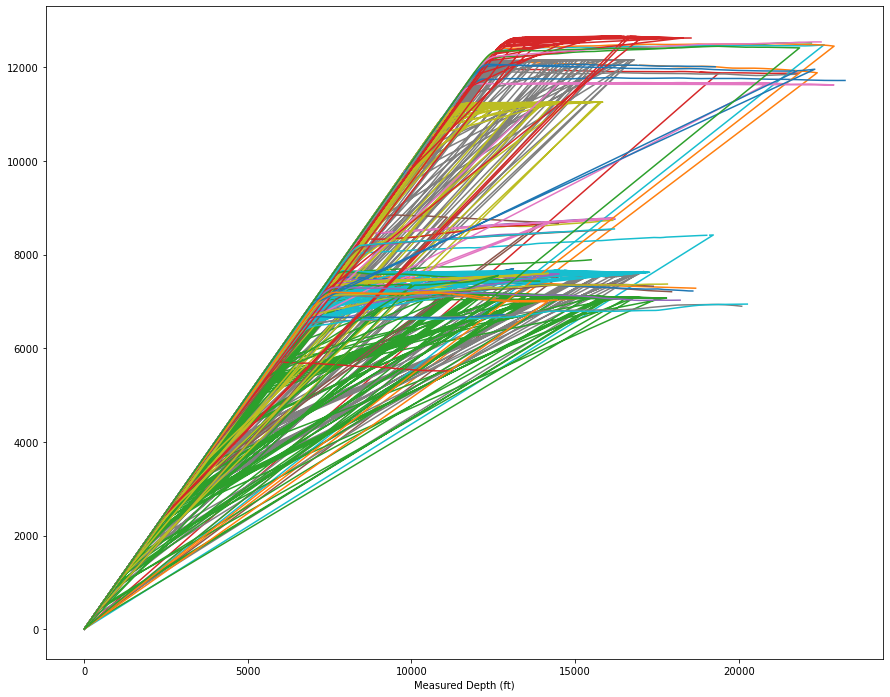

In [160]:
fig, ax = plt.subplots(figsize=(15,12))
deviation_survey.groupby(level=0).plot.line(x='Measured Depth (ft)', y='TVD (ft)', ax=ax, legend=False);

У большинства скважин есть горизонтальный участок, но не у всех. При прогнозах можно будет использовать длину горизонтального участка как независимую переменную.

In [161]:
well_data.to_csv('well_data_modified.csv')

# Корреляция добычи нефти и газа

In [20]:
oilgas_wells = production_data.loc[oil_producers_list, :]
oilgas_wells

Time (Days)  Choke Size  Gas Volume (MMscf)  Oil Volume (stb)  \
Lease                                                                     
CARDINAL          0.0         NaN             0.00000              0.00   
CARDINAL          1.0         NaN             0.00000              0.00   
CARDINAL          2.0         NaN             0.00000             12.08   
CARDINAL          3.0         NaN             0.03852            107.92   
CARDINAL          4.0         NaN             0.04470            110.00   
...               ...         ...                 ...               ...   
SWIFT          1241.0         NaN             0.03237             61.00   
SWIFT          1242.0         NaN             0.03100             53.00   
SWIFT          1243.0         NaN             0.03000             28.00   
SWIFT          1244.0         NaN             0.01400             37.00   
SWIFT          1245.0         NaN             0.00000             11.00   

          Water Volume  (stb)  Gas Lift Inj Volume  (MMscf)  \
Lease                                                         
CARDINAL                  0.0                           NaN   
CARDINAL                374.0                           NaN   
CARDINAL                986.0                           NaN   
CARDINAL                979.0                           NaN   
CARDINAL                948.0                           NaN   
...                       ...                           ...   
SWIFT                    41.0                           0.0   
SWIFT                     0.0                           0.0   
SWIFT                    23.0                           0.0   
SWIFT                    50.0                           0.0   
SWIFT                     2.0                           0.0   

          Casing Pressure  (psi(a))  Tubing Pressure  (psi(a))  \
Lease                                                            
CARDINAL                   0.000000                   0.000000   
CARDINAL                   0.000000                2400.000000   
CARDINAL                   0.000000                2300.000000   
CARDINAL                   0.000000                2275.000000   
CARDINAL                   0.000000                2225.000000   
...                             ...                        ...   
SWIFT                     86.495943                 119.639943   
SWIFT                     84.820943                  97.028943   
SWIFT                     86.695943                 117.195943   
SWIFT                     85.595943                 103.845943   
SWIFT                     84.495943                  90.495943   

          Active Pressure  (psi(a))  Line Pressure  (psi(a)) Pressure Source   \
Lease                                                                           
CARDINAL                   0.000000                59.585943  Tubing Pressure   
CARDINAL                2400.000000                59.585943  Tubing Pressure   
CARDINAL                2300.000000                59.585943  Tubing Pressure   
CARDINAL                2275.000000                59.585943  Tubing Pressure   
CARDINAL                2225.000000                59.585943  Tubing Pressure   
...                             ...                      ...              ...   
SWIFT                     86.495943                14.695943  Casing Pressure   
SWIFT                     84.820943                14.695943  Casing Pressure   
SWIFT                     86.695943                14.695943  Casing Pressure   
SWIFT                     85.595943                14.695943  Casing Pressure   
SWIFT                     84.495943                14.695943  Casing Pressure   

          Calculated Sandface Pressure  (psi(a))  
Lease                                             
CARDINAL                                     NaN  
CARDINAL                             6211.543163  
CARDINAL                             6107.965265  
CARDINAL                             5938.0982

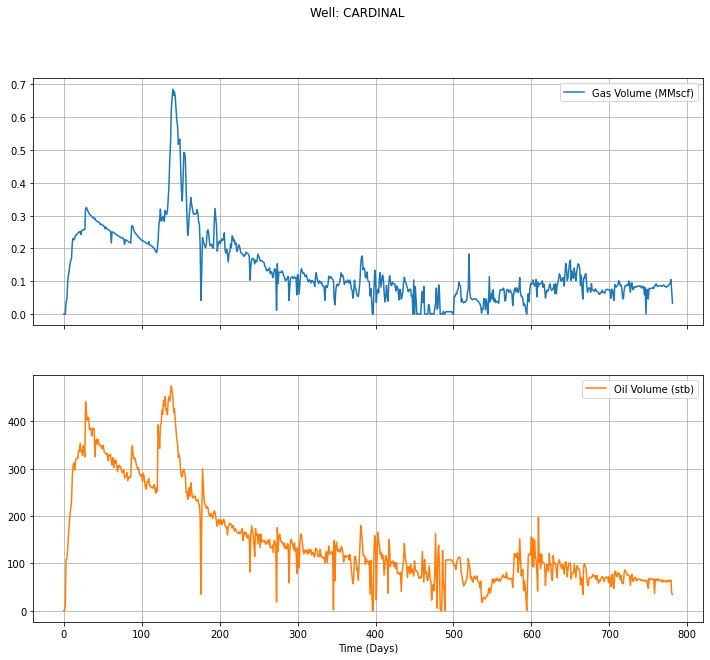

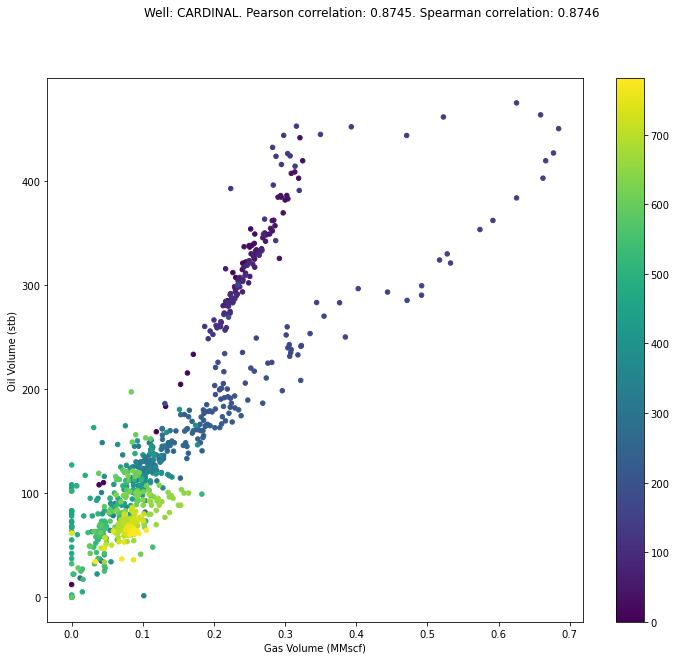

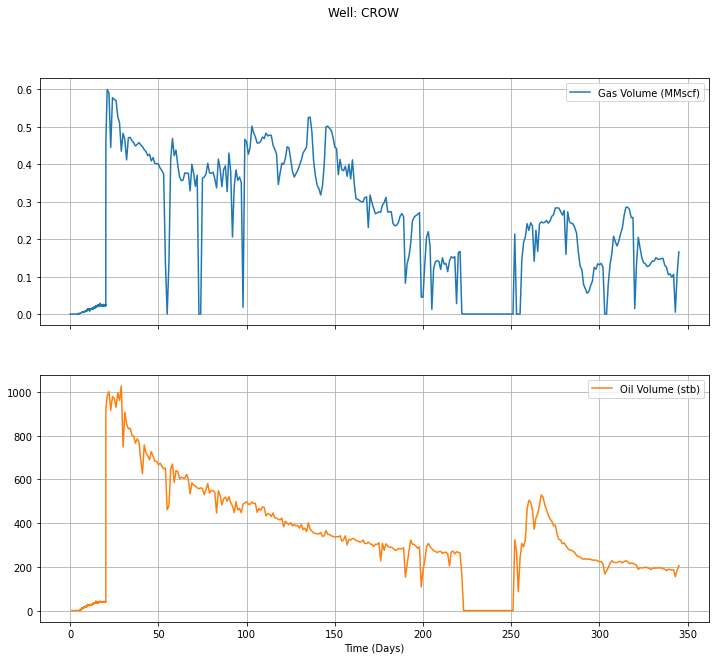

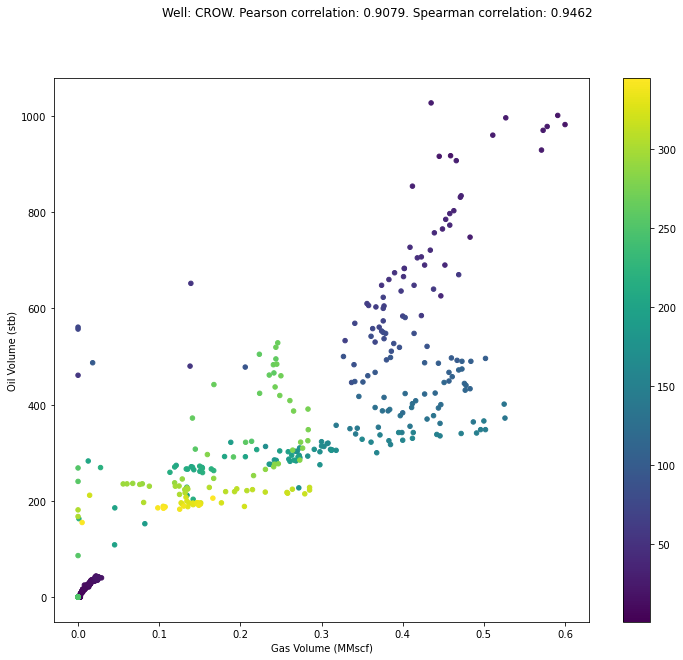

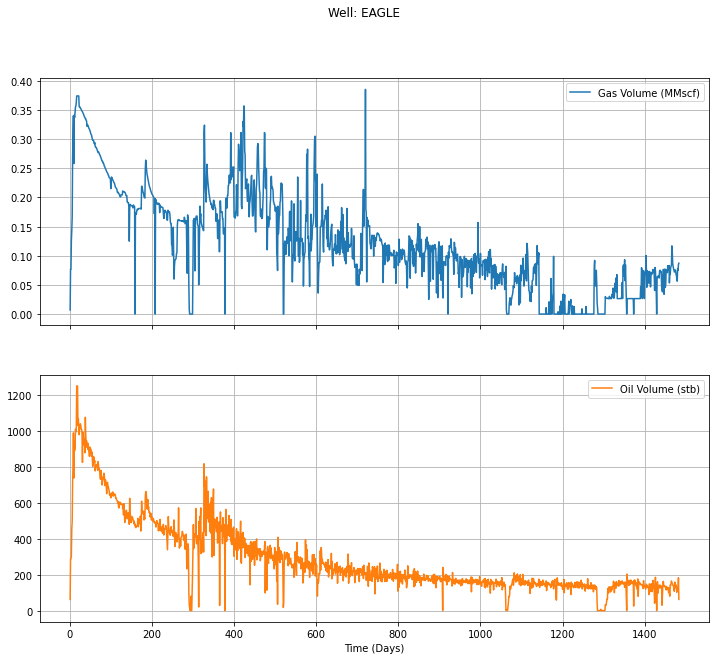

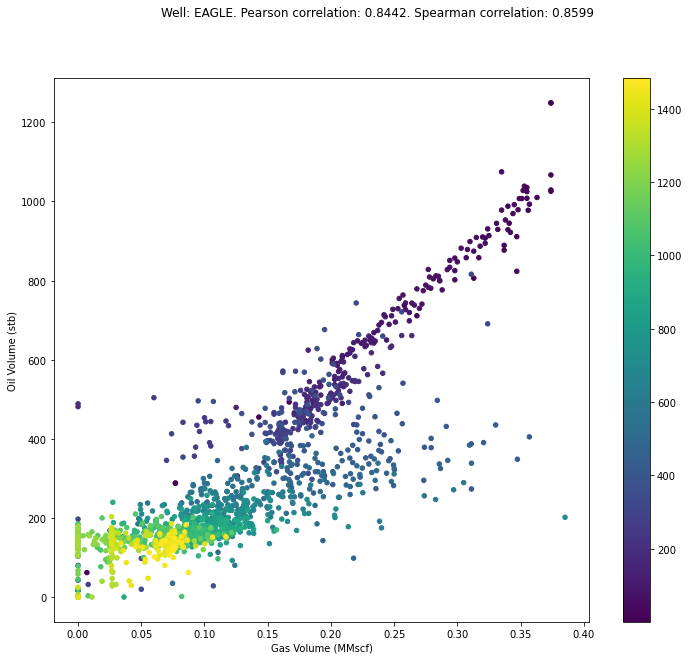

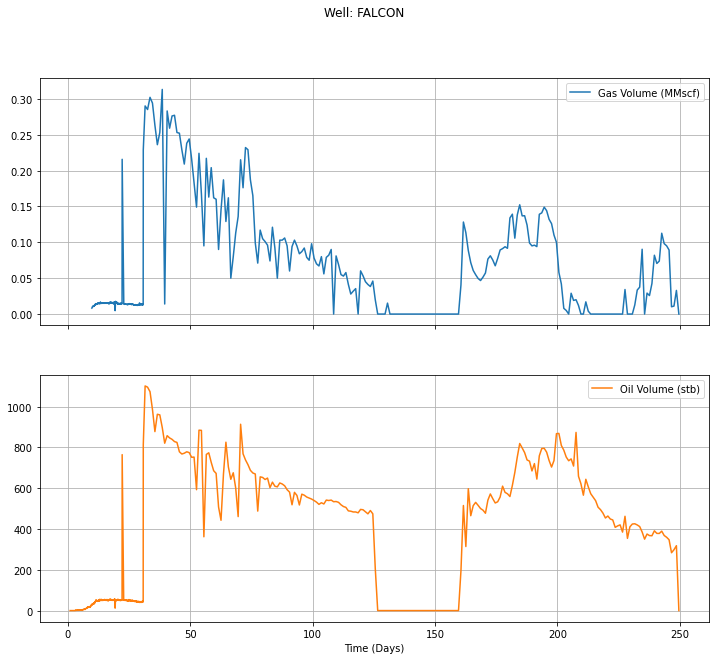

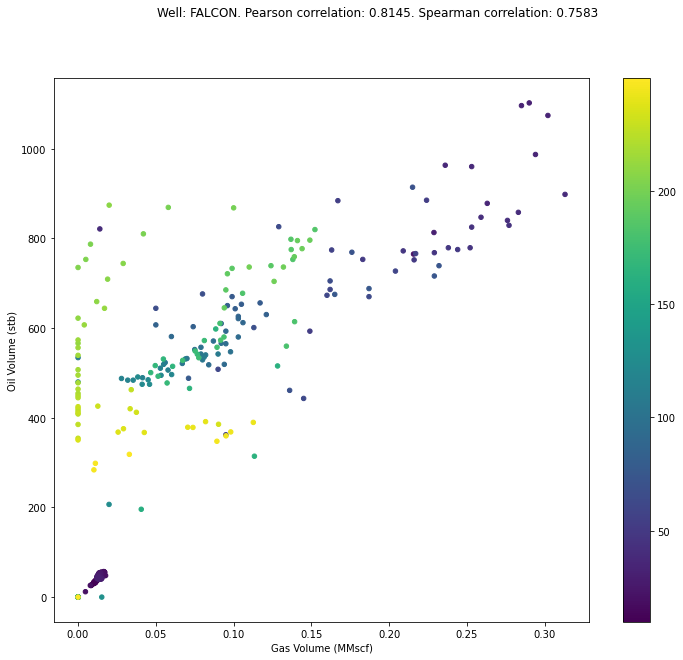

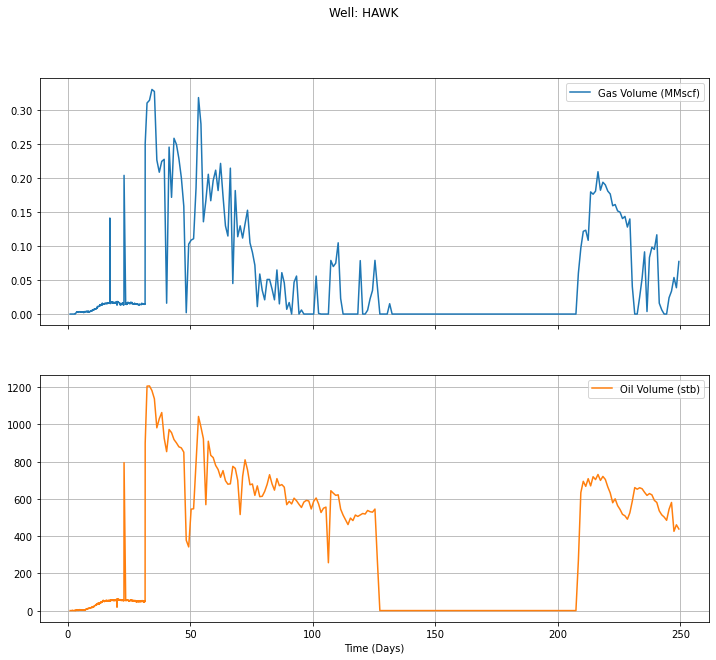

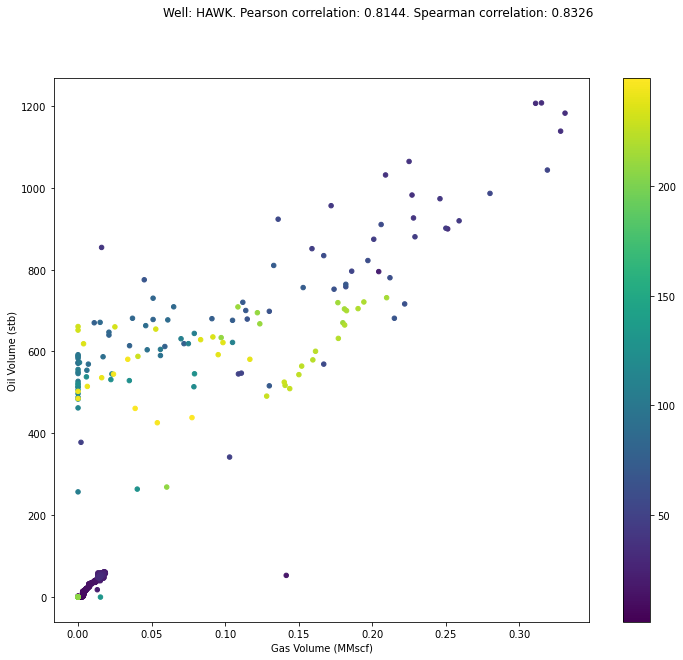

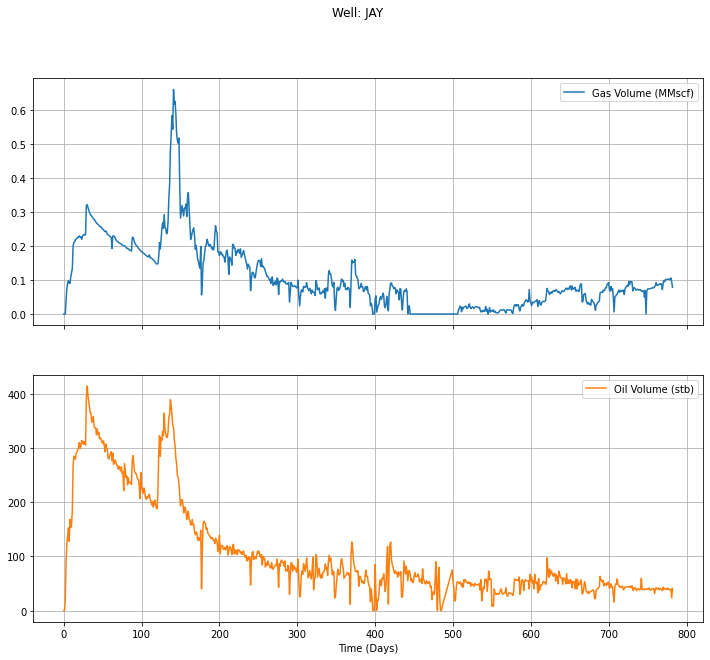

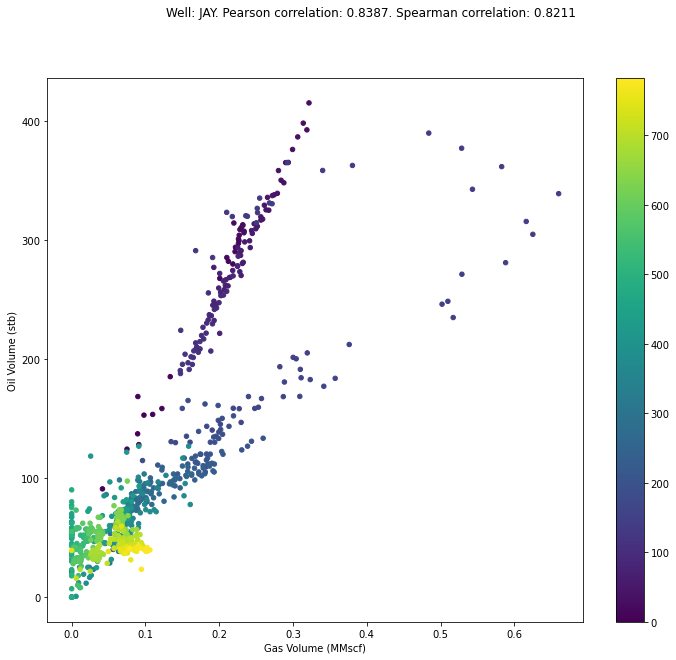

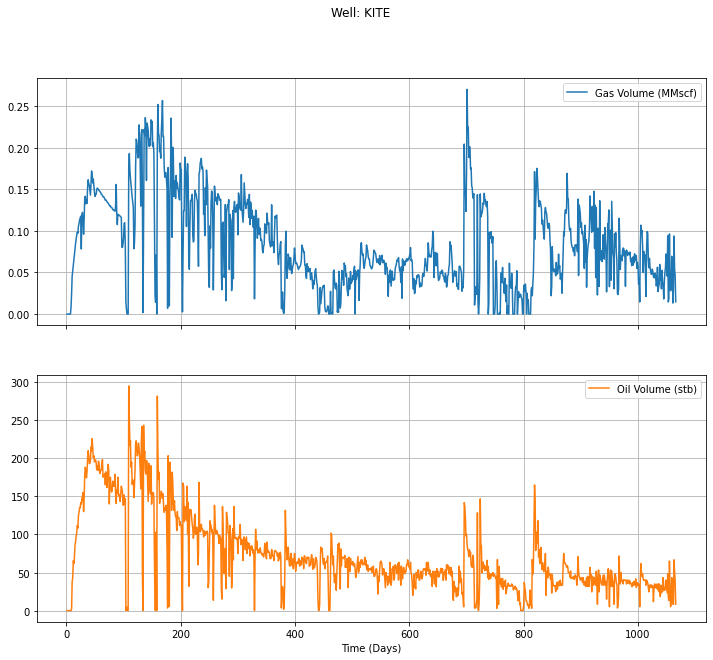

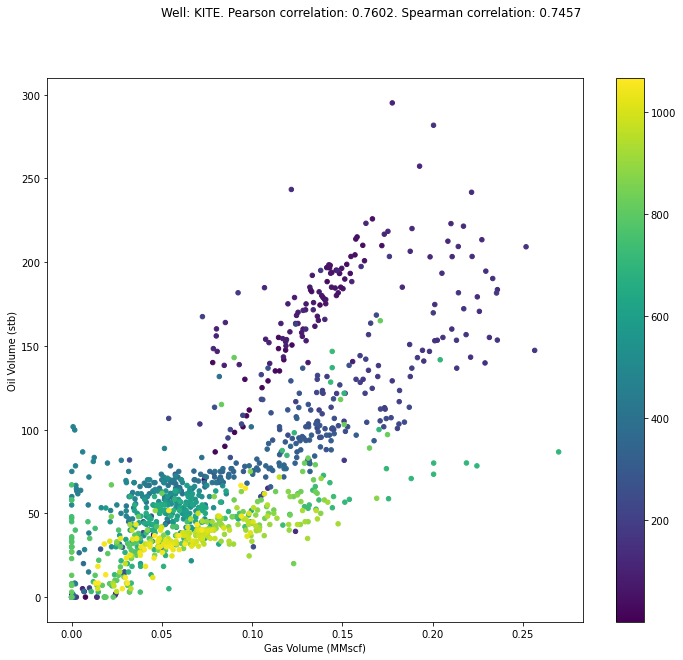

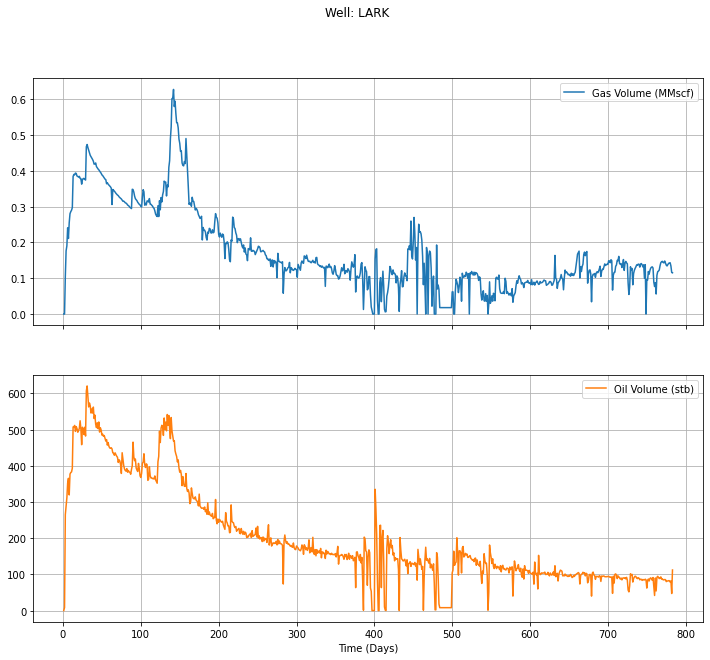

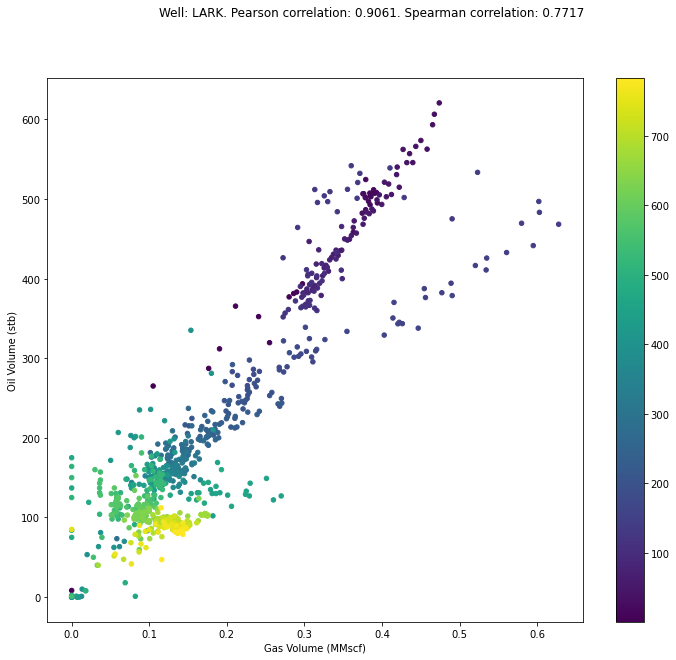

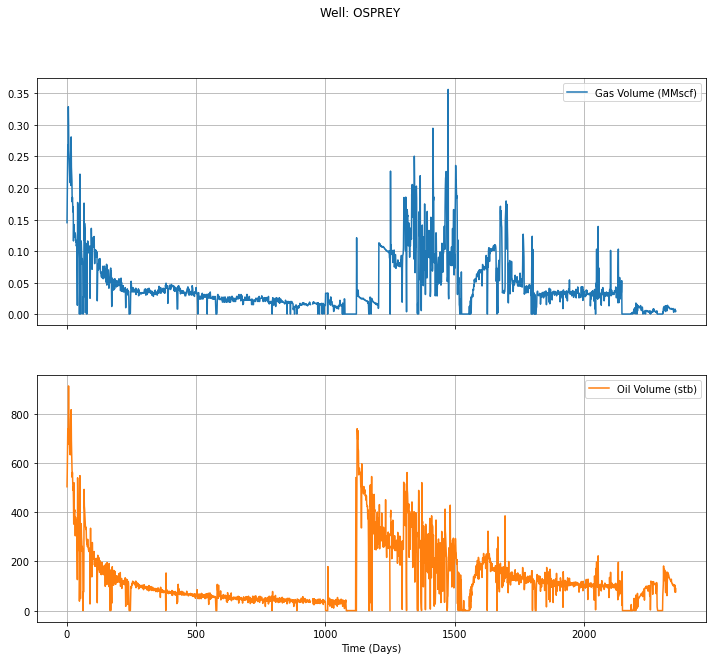

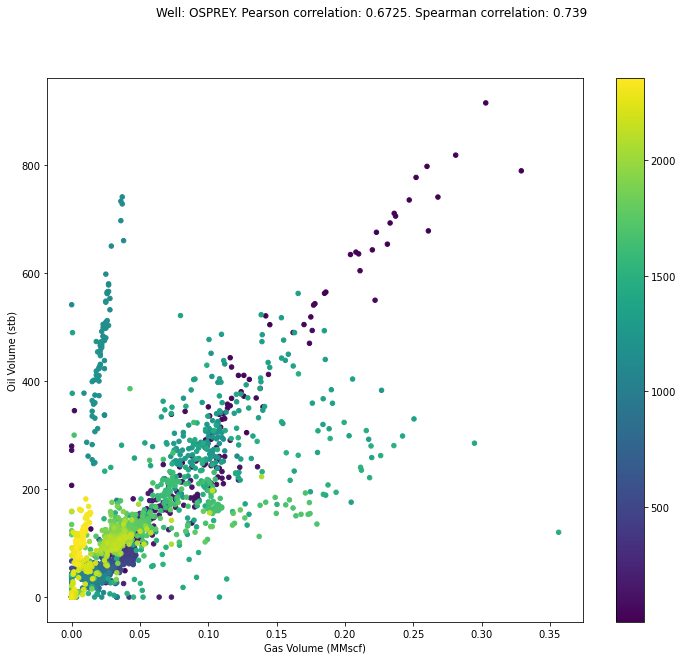

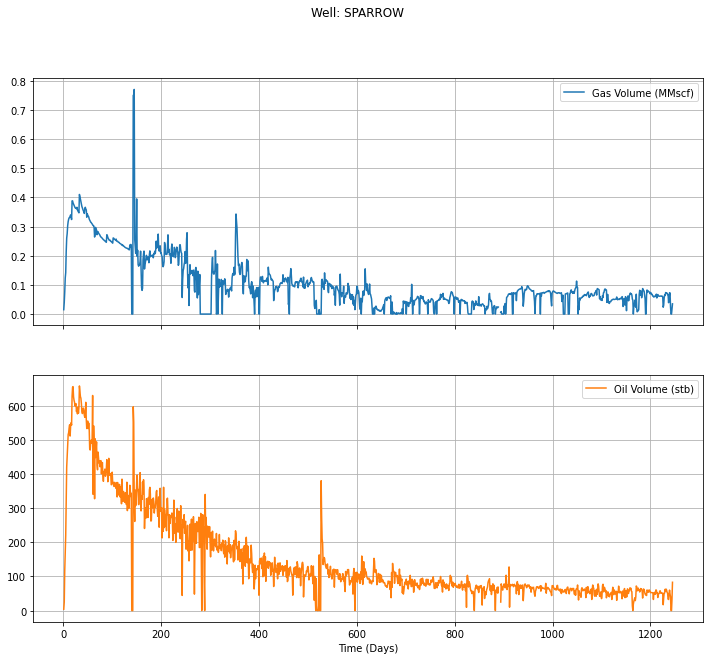

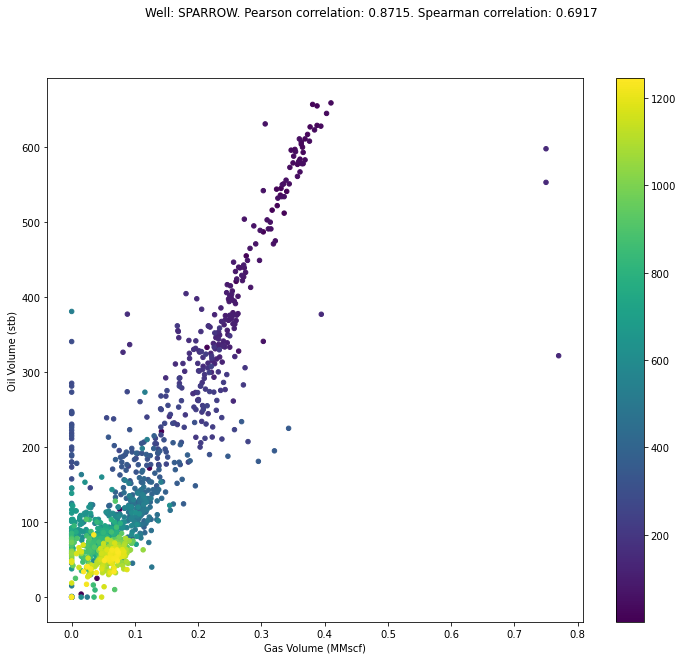

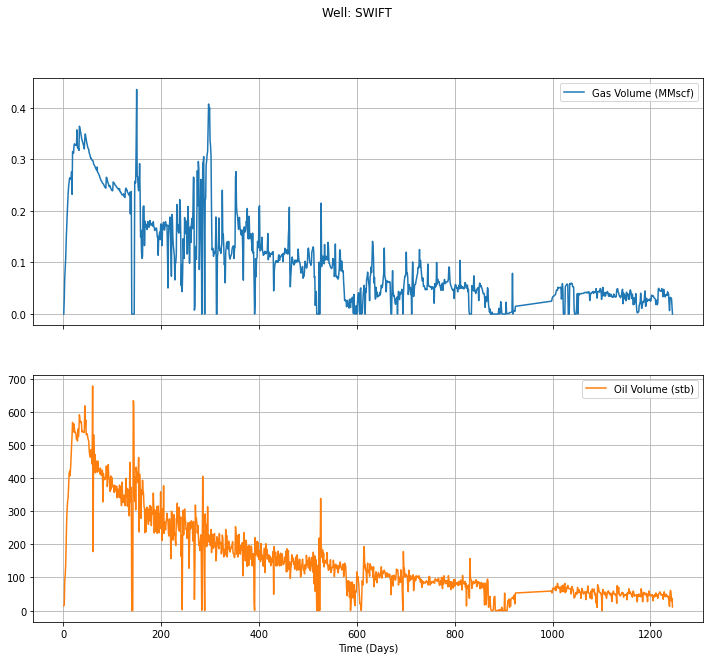

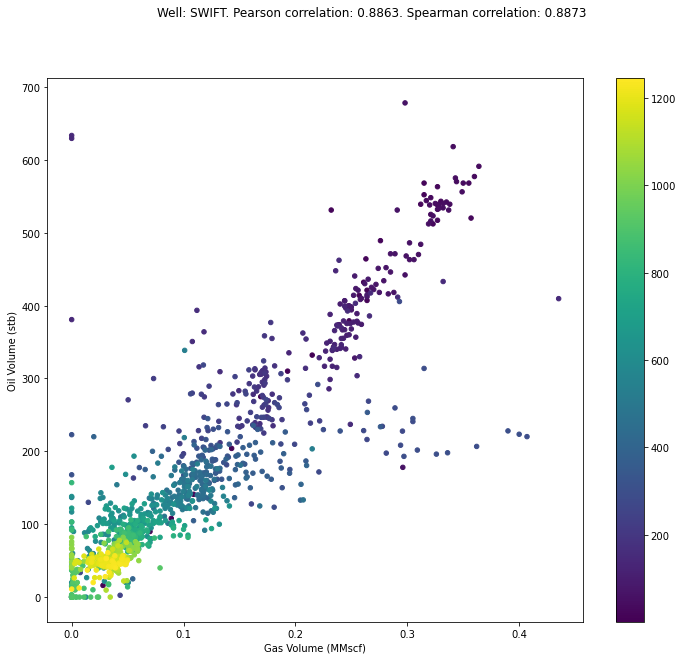

In [39]:
for well in oil_producers_list:
    temp = production_data.loc[well, :]
    temp.plot(x='Time (Days)',
              y=['Gas Volume (MMscf)', 'Oil Volume (stb)'],
             kind='line',
              figsize=(12,10),
             title='Well: ' + well,
             subplots=True,
             sharex=True,
             grid=True
             )
    plt.show();
    pearson = round(temp['Gas Volume (MMscf)'].corr(temp['Oil Volume (stb)'],
                                         method='pearson'), 4)
    spearman = round(temp['Gas Volume (MMscf)'].corr(temp['Oil Volume (stb)'],
                                         method='spearman'), 4)
    temp.plot(x='Gas Volume (MMscf)',
              y='Oil Volume (stb)',
             kind='scatter',
              figsize=(12,10),
             title='Well: ' + well + '. Pearson correlation: {}. Spearman correlation: {}'.format(pearson, spearman),
             subplots=True,
             c=temp['Time (Days)'],
             colorbar=True,
             xlabel='Gas Volume (MMscf)',
             sharex=False)
    plt.show();
    

Корреляция между дебитом нефти и газа есть, но коэффициент корреляции может быть разным на разных этапах эксплуатации. Визуально на ранних этапах корреляция лучше.

# Газлифт

In [33]:
gaslift_wells = production_data.groupby(level=0)\
    .agg({'Gas Lift Inj Volume  (MMscf)': 'sum'})\
    .rename(columns={'Gas Lift Inj Volume  (MMscf)': 'gaslift'})\
    .apply(lambda x: x != 0.0)

In [35]:
gaslift_wells_list = gaslift_wells[gaslift_wells.gaslift].index.to_list()
gaslift_wells_list

['CARDINAL',
 'CROW',
 'EAGLE',
 'FALCON',
 'HAWK',
 'JAY',
 'KITE',
 'LARK',
 'OSPREY',
 'SPARROW',
 'SWIFT']

In [10]:
oil_producers_list

['CARDINAL',
 'CROW',
 'EAGLE',
 'FALCON',
 'HAWK',
 'JAY',
 'KITE',
 'LARK',
 'OSPREY',
 'SPARROW',
 'SWIFT']

In [36]:
gaslift_wells_list == oil_producers_list

True

Во всех скважинах, из которых добывали нефть, применялся газлифт.

Красные вертикальные линии - точки внесения изменений согласно файлу well_data.csv

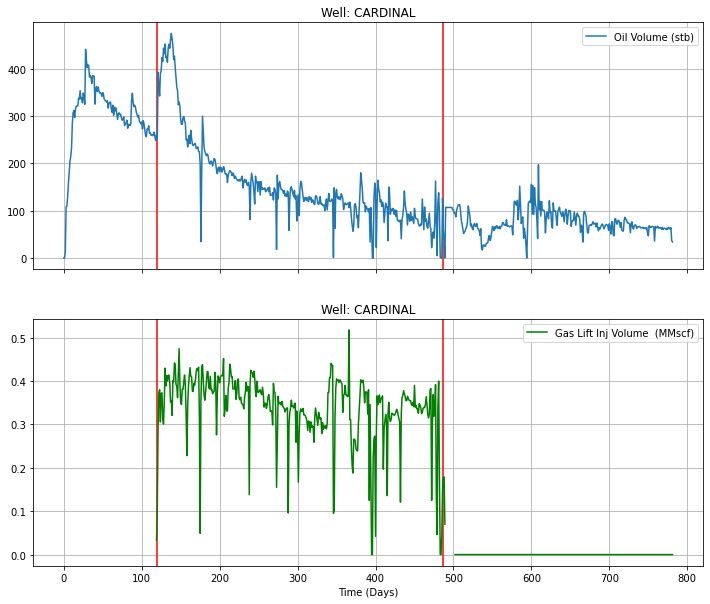

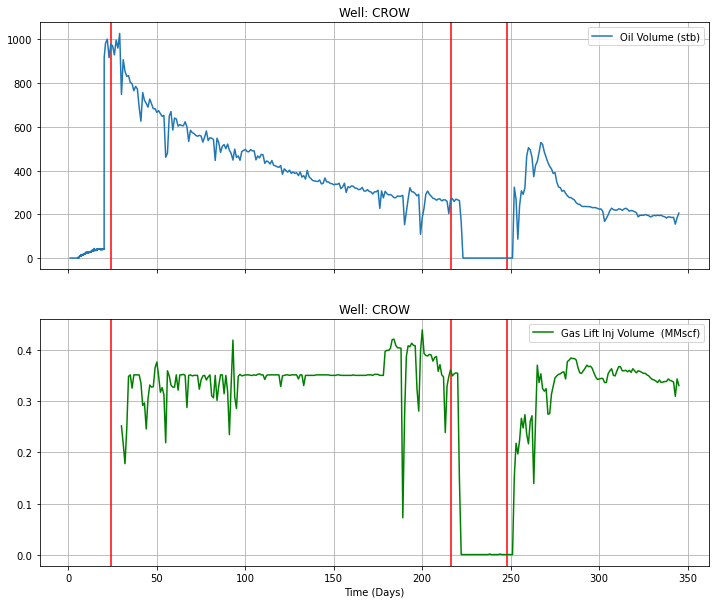

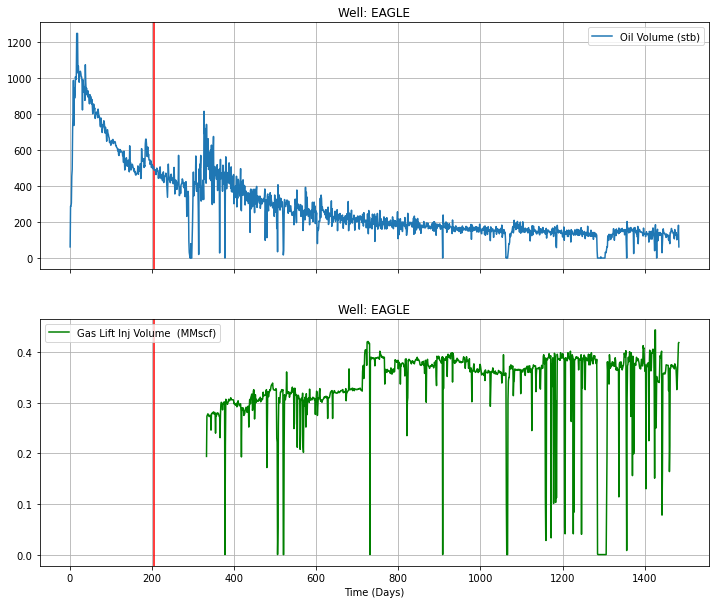

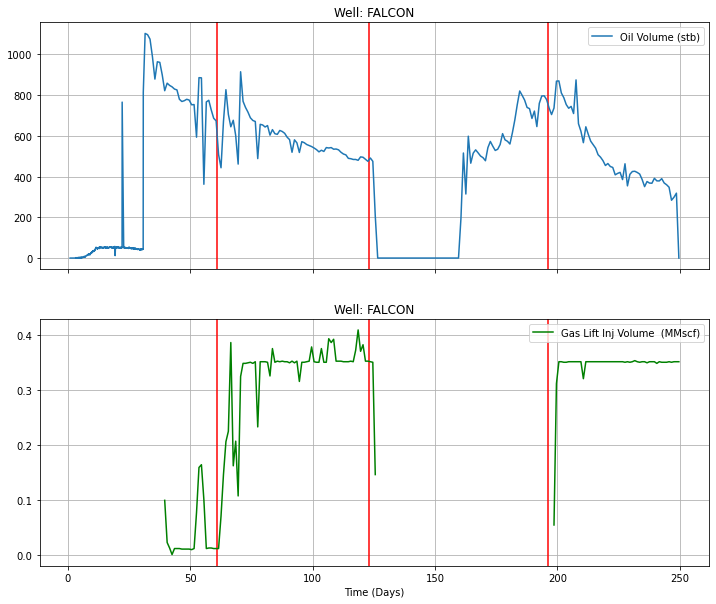

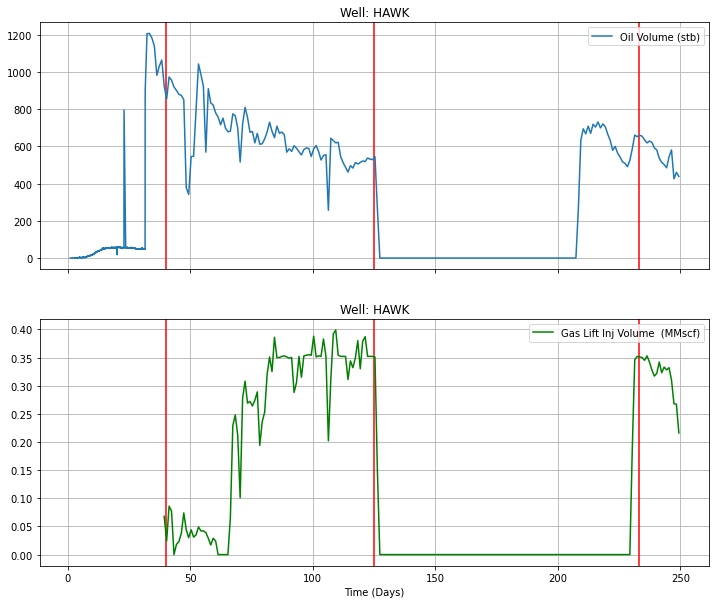

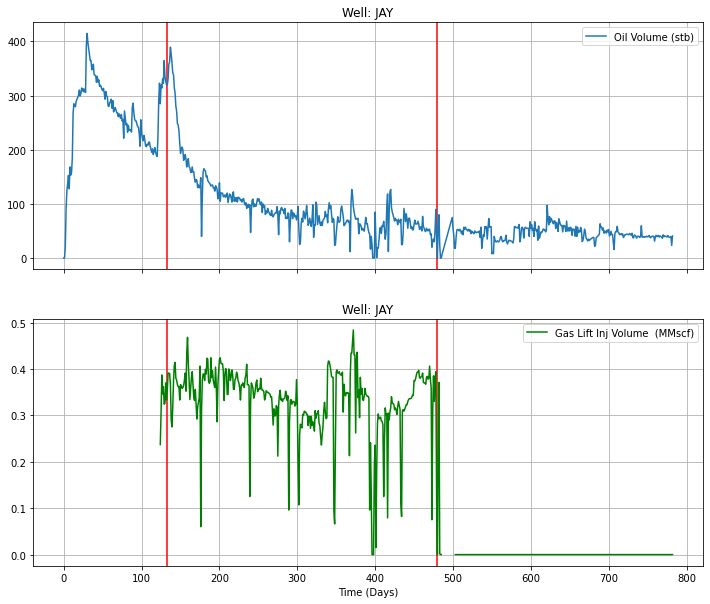

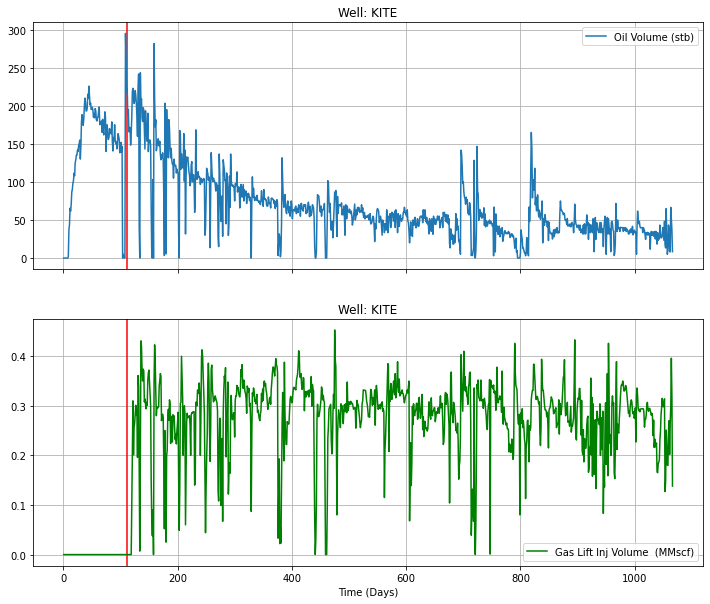

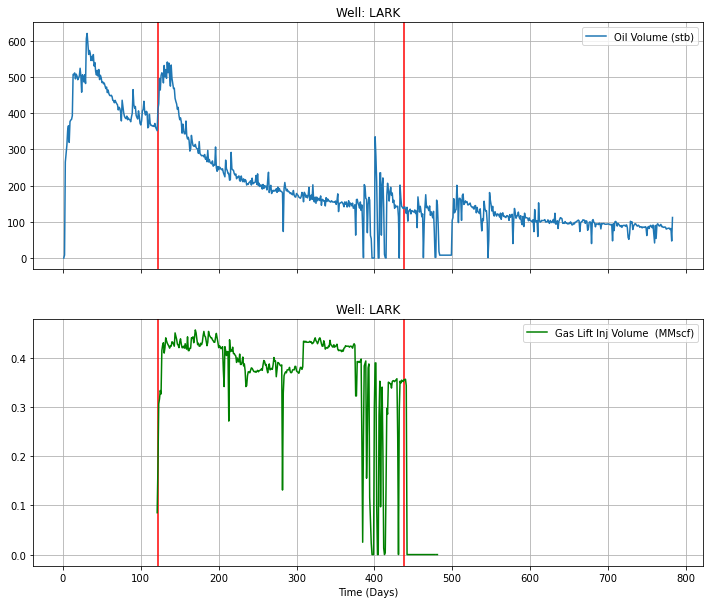

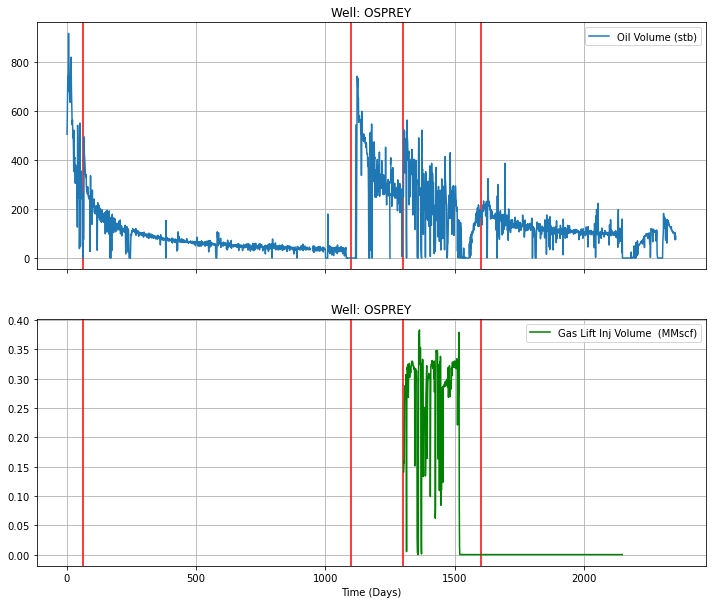

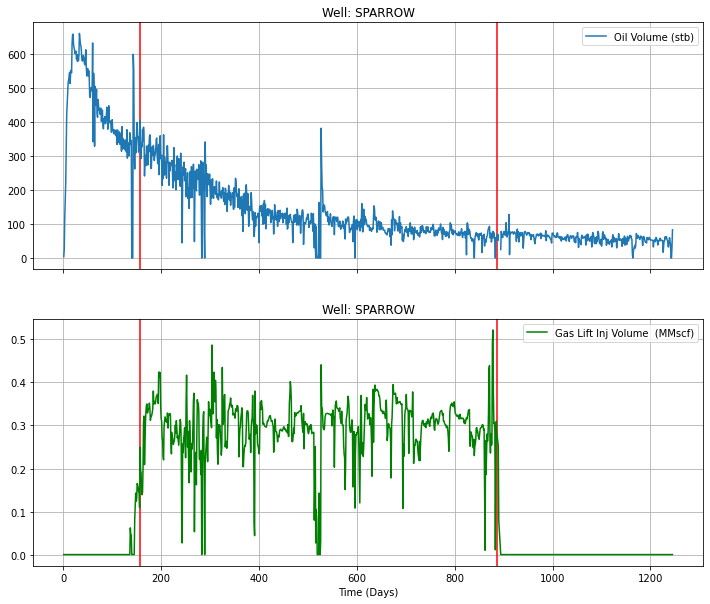

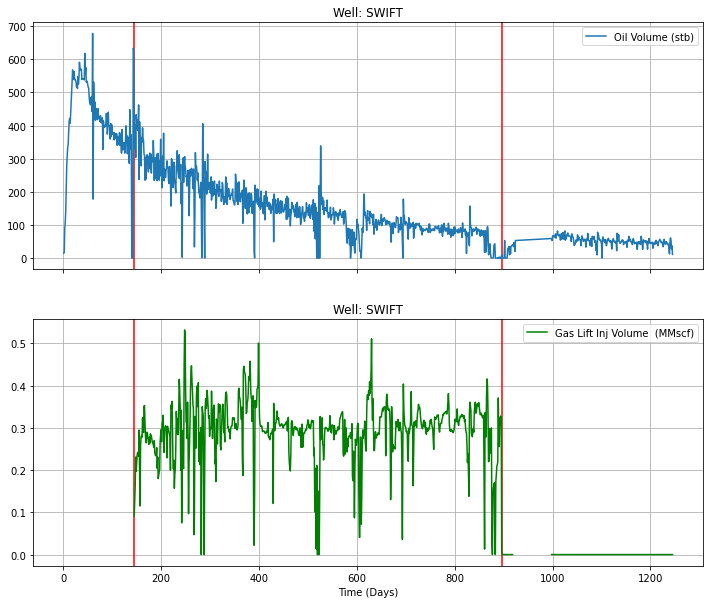

In [50]:
for well in oil_producers_list:
    temp = production_data.loc[well, :]
    fig = plt.figure(figsize=(12,10))
    ax1 = fig.add_subplot(211)
    ax1.axvline(well_data.loc[well, ' Configuration Change (Days Since First Prod) '], color='r')
    ax1.axvline(well_data.loc[well, ' Configuration Change (Days Since First Prod) .1'], color='r')
    ax1.axvline(well_data.loc[well, ' Configuration Change (Days Since First Prod) .2'], color='r')
    ax1.axvline(well_data.loc[well, ' Configuration Change (Days Since First Prod) .3'], color='r')
    temp.plot(x='Time (Days)',
              y='Oil Volume (stb)',
             kind='line',
             title='Well: ' + well,
             grid=True,
              ax=ax1)
    ax2 = fig.add_subplot(212, sharex = ax1)
    ax2.axvline(well_data.loc[well, ' Configuration Change (Days Since First Prod) '], color='r')
    ax2.axvline(well_data.loc[well, ' Configuration Change (Days Since First Prod) .1'], color='r')
    ax2.axvline(well_data.loc[well, ' Configuration Change (Days Since First Prod) .2'], color='r')
    ax2.axvline(well_data.loc[well, ' Configuration Change (Days Since First Prod) .3'], color='r')
    temp.plot(x='Time (Days)',
              y='Gas Lift Inj Volume  (MMscf)',
             kind='line',
             title='Well: ' + well,
             grid=True,
              ax=ax2,
             color='g')
    plt.show();    

Начало и прекращение газлифта почти всегда совпадают с внесением изменений.

# Вода

In [52]:
water_wells = production_data.groupby(level=0)\
    .agg({'Water Volume  (stb)': 'sum'})\
    .rename(columns={'Water Volume  (stb)': 'water'})\
    .apply(lambda x: x != 0.0)

In [54]:
water_wells_list = gaslift_wells[water_wells.water].index.to_list()

In [57]:
all_wells = production_data.index.unique().to_list()

In [59]:
set(water_wells_list) == set(all_wells)

True

Воду дают все скважины

# Разделение на тренировочную и тестовую выборки - не делал, т.к. нужна доп. обработка

В идеале нужно было разделять со стратификацией по пластам и типам скважин (чисто газовая или газ с нефтью), но на божерские сланцы пробурена всего одна скважина, использую только тип скважины.

from sklearn.model_selection import train_test_split

well_data_train, well_data_test = train_test_split(well_data, 
                                                   test_size=0.2,
                                                   random_state=8,
                                                   shuffle=True, 
                                                   stratify=well_data['oil_producer'])

test_set = well_data_test.index
train_set = well_data_train.index

well_data_train.to_csv('well_data_modified_train.csv')
well_data_test.to_csv('well_data_modified_test.csv')

production_data.loc[train_set , :].to_csv('production_data_train.csv')

production_data.loc[test_set , :].to_csv('production_data_test.csv')

deviation_survey.loc[train_set , :].to_csv('deviation_survey_train.csv')

deviation_survey.loc[test_set , :].to_csv('deviation_survey_test.csv')